# CODE CHUNK - FOURIER ANALYSIS

We consider a function $f(x)$ and compute its value and the value of its truncated Fourier Series $S_n(x)$ at certain evalutaion nodes in $[-\pi, \pi]$. Next, we compute the error in approximation and also check for the rate of convergence. Finally, we plot the relevant graphs for a proper visualization.

We consider the following functions:
1. $f(x) = \pi$, a constant function.
2. $f(x) = x$, the identity function.
3. $f(x) = sin(x) + cos(x)$, a $C^{\infty}$ function.
4. $f(x) = |x|^{\frac{3}{2}}$, a $C^1$ function.
5. $f(x) = |x|$, a $C^0$ function.
6. $f(x) = signum(x)$, a function with jump discontinuity.
7. $f(x) = \frac{1}{x}$, a function with a discontinuity of the second type.

Next, we consider the case $f(x) = x$ under increased number of evaluation nodes in order to observe Gibb's Phenomenon.

## Contents :
1. Engine
2. Error Analysis
3. Graphs and Plots
4. Main functions to generate results
5. Results
    1. A constant function
    2. The identity function
    3. A $C^{\infty}$ function
    4. A $C^1$ function
    5. A $C^0$ function
    6. A function with jump discontinuity
    7. A function with a discontinuity of the second type

In [1]:
# Import all required libraries

import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib

## 1. Engine

### Contents for this section :

This section mainly comprises functions to generate the Fourier Series approximation of an input function. The functions which go by the names **a_k(f)** and **b_k(f)**, gives a list containing the fourier coefficients for a given input function in the interval ($-\pi, \pi$). The function named **fourier_series(fx, xs)** provides the fourier approximation values of the input function at the evaluation nodes upto a certain truncation.


### Dependencies :
1. a_k(), b_k() : depends only on inputs.
2. fourier_series(*, *) : depends on a_k(), b_k() and inputs.


The construction of these functions are self-explanatory.

### Some notes for the codes in this section :

1. For computing the Fourier Coefficients, which involves integration, numerical integration using **Gaussian Quadratures** have been used. For the algorithm at work visit "https://books.google.co.in/books/about/Numerical_Analysis.html?id=zXnSxY9G2JgC&redir_esc=y", page-228; and for the implementation details visit "https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.fixed_quad.html".

2. Numpy documentaion can further be reffered for the rest programming done.

In [2]:
# Functions for generating the Fourier Coefficients:

def a_k(f):
    #---------------------------------------------------
    # Input  : - f(x), the function under consideration
    # Output : - a list containing a_k values, fourier coefficients
    #---------------------------------------------------

    global a
    a = []
    for k in range(m+1):
        intg = lambda x: f(x) * np.cos(k * x)
        val = (1 / np.pi) * (integrate.fixed_quad(intg, -np.pi, np.pi, n=3400)[0])
        if k == 0:
            a.append(val / 2)
        else:
            a.append(val)
    return a



def b_k(f):
    #---------------------------------------------------
    # Input  : - f(x), the function under consideration
    # Output : - a list containing b_k values, fourier coefficients
    #---------------------------------------------------

    global b
    b = []
    for k in range(m+1):
        intg = lambda x: f(x) * np.sin(k * x)
        val = (1 / np.pi) * (integrate.fixed_quad(intg, -np.pi, np.pi, n=3400)[0])
        if k == 0:
            b.append(float(0))
        else:
            b.append(val)
    return b

In [3]:
# A Function to provide the pointwise summation of the corresponding truncated fourier series.

def fourier_series(fx, xs):
    #---------------------------------------------------
    # Input  : - f(x), the function under consideration
    #          - xs, the evaluation nodes
    # Output : - a list containing the approximated functional values at the evaluation points
    #---------------------------------------------------

    apprx = []
    cs = []
    sn = []

    for x in xs:
        for k in range(m+1):
            valcs = np.cos(k * x)
            cs.append(valcs)

            valsn = np.sin(k * x)
            sn.append(valsn)

            if len(cs) == m + 1:
                v1 = sum(list(np.multiply(a_k(fx), cs)))
                v2 = sum(list(np.multiply(b_k(fx), sn)))
                apprx.append(v1 + v2)
                cs = []
                sn = []

    return apprx

## 2. Error Analysis

### Contents for this section :

This section contains a single function to provide the error in approximation. The methodology of the error function is given as follows.

### Dependencies :

1. err(f_exct, f_app): fourier_series(*, *) and inputs.

### Some notes for the codes in this section :

1. The Discrete - $l_\infty$ norm on a vector $x = (x_1, x_2, \cdots, x_n)$ is defined as:
$$||x||_{\infty} = \mathop{sup}_{k}\{|x_{k}|\}.$$

2. In the present context, we first compute $|f_{exact} - f_{approx}|$, componentwise where each component is calculated for a selected evaluation node or evaluation point. Then we apply the discrete $l_{\infty}$ norm on it to get the error in approximation.  

In [4]:
# A function to compute the error in approximation:

def err(f_exct, f_app):
    #---------------------------------------------------
    # Input  : - f_exct, the functional vaules at the evaluation nodes
    #          - f_apprx, the pointwise approximated functional values at the evaulation nodes
    # Output : - er, the error in approximation
    #..................
    # Note  : theoretically, the error function used is the discrete l-infinity norm
    #..................
    #---------------------------------------------------
    er = 0

    err_vec = [abs(x - y) for x, y in zip(f_exct, f_app)]         #considering the absolute value of difference...
    er = max(err_vec)                                             #considering the discrete l_infinity norm...

    return er

## 3. Graphs & Plots

This section contains a single callable function to generate (f_exact vs xeval) and (f_approx vs xeval) plots. Standard library, **Matplotlib** has been used with self explanatory coding structure. Documentation for matplotlib at: https://matplotlib.org .

In [42]:
# A function to plot the (f_exact vs xeval) and (f_approx vs xeval) graphs:

def drawing(a, b, t):
    #---------------------------------------------------
    # Input  : - a, the f_approx
    #          - b, the f_exact
    #          - t, the evaulation nodes
    # Output : - A singlr plot with (t,a) and (t,b) curves
    #---------------------------------------------------

    plt.figure(figsize=(15,9))
    plt.plot(t, a, 'orange', label='f Approx., S_n(x)')       # plotting t, a separately...
    plt.plot(t, b, 'green', label='f Exact')                  # plotting t, b separately...
    #plt.gca().set_ylim([0, 4])
    plt.legend()
    plt.show()

    return None

## 4. Main functions to generate results

The functions present in this section provides appropriate outputs with graphical plots.

### Dependencies :

1. results(*, *, *): depends on all functions defined above and inputs.

### Some notes for the codes in this section :

1. For a convergent sequence $\{a_n\}$ converging to a point $a$, we define the **rate of convergence** $\mu$ as:
$$\mu = \mathop{lim}_{n\to \infty}\frac{|a_{n+1}-a|}{|a_n-a|^{\alpha}},$$ where $\alpha$ denotes the **order of convergence**.

In [6]:
# lists to store the approximated values near endpoints...
gibbl = []
gibbr = []

def results(m, numb, fxn):
    #---------------------------------------------------
    # Input  : - k, the truncation limit for the series
    #          - numb, the number of evaluation points
    #          - fxn, the function under consideration
    # Output : - ...self explanatory...
    #---------------------------------------------------

    # 'xval' equally spaced points in the interval [-pi, pi]; basically the evaulation nodes...
    xval = list(np.linspace(-np.pi, np.pi, num= numb))

    # Approximated functional values using the truncated fourier series...    
    f_apprx = fourier_series(fxn, xval)
    
    
    global a
    a = []
    global b
    b = []

    # A list to store all the functional values at the evaluation nodes:
    f_exact = []
    for x in xval:
        f_exact.append(fxn(x))
    
    #------ Gibb's Phenomena...
    
    if len(xval) == 5000:
        global gibbl
        global gibbr
        
        xnot = (2 * np.pi) / ((2 * m) + 1) 
        anot = -np.pi + xnot
        bnot = np.pi - xnot
        
        for i in range(5000):
            if round(xval[i],3) >= round(anot,3):
                gibbl.append(abs(f_apprx[i] - f_exact[0]))
                break
                
        for j in reversed(range(5000)):
            if round(xval[j],3) <= round(bnot,3):
                gibbr.append(abs(f_apprx[j] - f_exact[-1]))
                break 
                
    #----- End of Gibb's Component...

    # The error in approximation...
    error_pt = err(f_exact, f_apprx)

    # Information Display module...
    print('------------------------------')
    print('Results computed (m = ' + str(m) + ')')
    print('------------------------------')
    #print('The approximated functional values are :')
    #print(f_apprx)
    #print('The evaluated functional values are ')
    #print(f_exact)
    print('The error in approximation is : ', error_pt)
    #print('------------------------------')
    #print('Graph (m = ' + str(m) + ')')
    #print('------------------------------')
    drawing(f_apprx, f_exact, xval)
    print('--- end ---')
    print('\n')
    print(' ')

    return error_pt

In [7]:
def result(m, numb, fxn):
    #---------------------------------------------------
    # Input  : - k, the truncation limit for the series
    #          - numb, the number of evaluation points
    #          - fxn, the function under consideration
    # Output : - ...self explanatory...
    #---------------------------------------------------

    # 'xval' equally spaced points in the interval (-pi, pi); basically the evaulation nodes...
    xval = list(np.linspace(-np.pi, np.pi, num= numb + 1, endpoint=False))[1:]

    # Approximated functional values using the truncated fourier series...
    f_apprx = fourier_series(fxn, xval)
    global a
    a = []
    global b
    b = []

    # A list to store all the functional values at the evaluation nodes:
    f_exact = []
    for x in xval:
        f_exact.append(fxn(x))

    # The error in approximation...
    error_pt = err(f_exact, f_apprx)

    # Information Display module...
    print('------------------------------')
    print('Results computed (m = ' + str(m) + ')')
    print('------------------------------')
    #print('The approximated functional values are :')
    #print(f_apprx)
    #print('The evaluated functional values are ')
    #print(f_exact)
    print('The error in approximation is : ', error_pt)
    #print('------------------------------')
    #print('Graph (m = ' + str(m) + ')')
    #print('------------------------------')
    drawing(f_apprx, f_exact, xval)
    print('--- end ---')
    print('\n')
    print(' ')

    return error_pt

In [8]:
def r_conv(erx):
    #---------------------------------------------------
    # Input  : - erx, the error vector for each truncation case
    # Output : - ...self explanatory...
    #---------------------------------------------------

    erp = []
    for i in range(1,len(erx)):
        val = erx[i] / erx[i - 1]
        erp.append(val)

    print("The Ratio values E-2N/E-N are:")
    print(erp)
    print("\n Graph:")
    plt.plot(erp, color='royalblue')                 #................plot the data
    plt.gca().set_ylim([0, 3])

    plt.title("Rate of Convergence")                 #................set the title of the graph
    plt.show()                                       #................display the graph

    return None

In [9]:
def gibbs(left, right):
    #---------------------------------------------------
    # Input  : - left, the approximated value near the left endpoint
    #          - right, the approximated value near the right endpoint
    # Output : - ...self explanatory...
    #---------------------------------------------------
    
    t=[]
    cons = 0.089489872236083635116 * 2 * np.pi     #........Actuall converging error value 
    for s in range(len(left)):
        t.append(cons)
    
    print("|S_n(x)-f(x)| values near the left endpoint are:")
    print(left)
    print('-----------------')
    print("|S_n(x)-f(x)| values near the right endpoint are:")
    print(right)
    
    
    #plt.subplots(figsize=(7,4))
    
    #plt.subplot(1, 2, 1)  # row 1, column 2, count 1
    plt.figure(figsize=(7,4))
    plt.plot(left, color='royalblue', label='Error')                #................plot the data
    plt.plot(t, color='orange', label='Anticipated convergence error')  #................plotting t, b separately
    plt.gca().set_ylim([0, 1])
    plt.legend()
    plt.title("Near the left endpoint")              #................set the title of the graph
    plt.show()                                       #................display the graph
    
    
    #plt.subplot(1, 2, 2)  # row 1, column 2, count 2
    plt.figure(figsize=(7,4))
    plt.plot(right, color='seagreen', label='Error')                #................plot the data
    plt.plot(t, color='orange', label='Anticipated convergence error')  #................plotting t, b separately
    plt.gca().set_ylim([0, 1])
    plt.legend()
    plt.title("Near the right endpoint")             #................set the title of the graph
    plt.show()                                       #................display the graph


    return None

## 5. Results

First, we perform the computations for all the considered functions with equidistant nodes from $[-\pi, \pi]$, including the endpoints. Then we repeat all the computations for equidistant nodes from $[-\pi, \pi]$ this time just not considering the endpoints for evaluation.

##### For the function $f(x) = x$:
In the scenario when endpoints are considered for evaluation, we can observe oscilatory behaviour of $S_n(x)$ near the points of jump discountinuity, but the error observed there is not 10% of the jump. Whereas, in the second scenario when endpoints are not considered, the error can be seen to reach 10% of the jump.

### 5.1. Constant function | $f(x) = \pi$

In [10]:
# Creating an interator list...

k = 10
iter =[k]
for i in range(7):
    x = 2 * k
    iter.append(x)
    k = x

------------------------------
Results computed (m = 10)
------------------------------
The error in approximation is :  5.548894677076532e-12


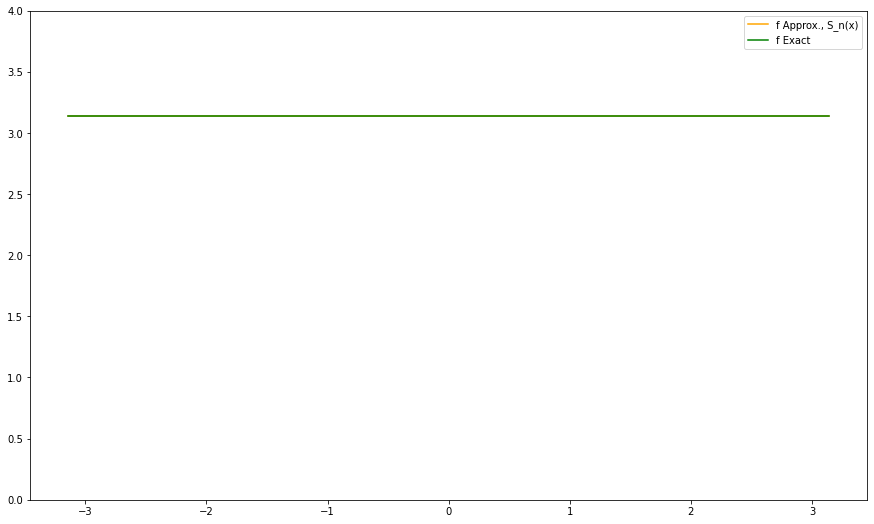

--- end ---


 
------------------------------
Results computed (m = 20)
------------------------------
The error in approximation is :  1.1963319224150837e-11


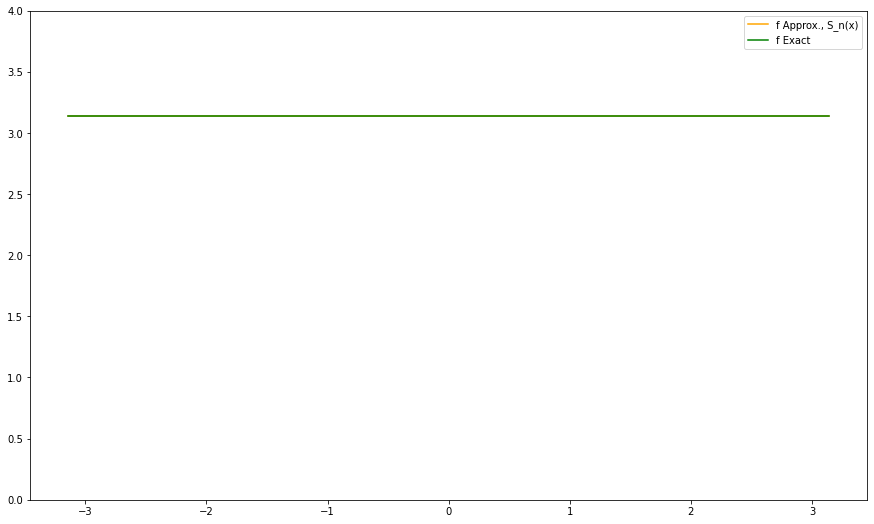

--- end ---


 
------------------------------
Results computed (m = 40)
------------------------------
The error in approximation is :  2.525313291812381e-11


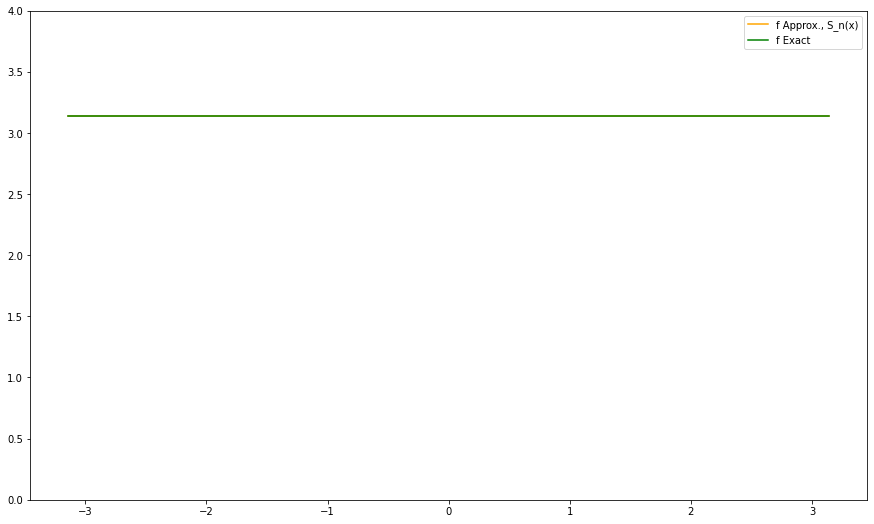

--- end ---


 
------------------------------
Results computed (m = 80)
------------------------------
The error in approximation is :  5.305444972236728e-11


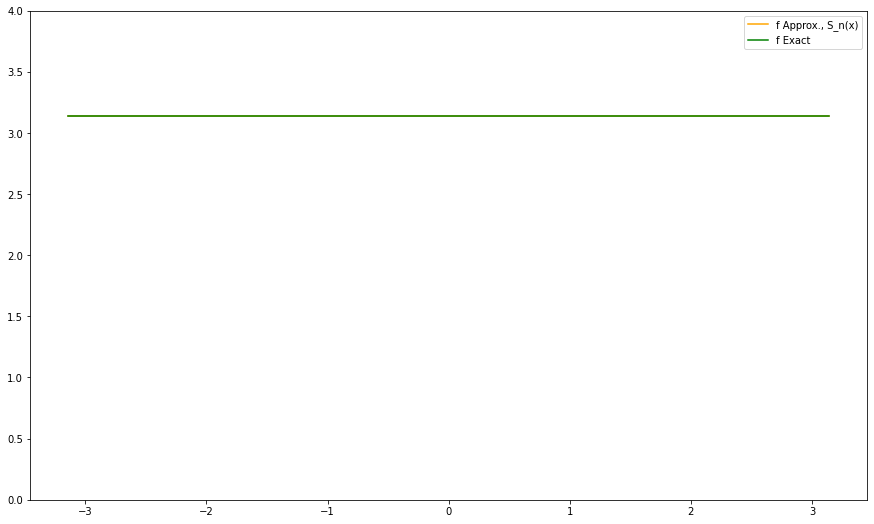

--- end ---


 
------------------------------
Results computed (m = 160)
------------------------------
The error in approximation is :  1.0197842570391913e-10


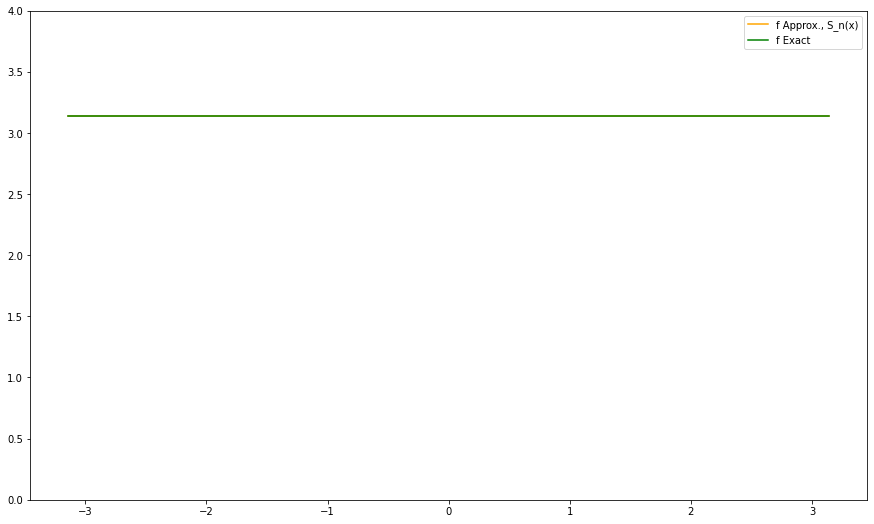

--- end ---


 
------------------------------
Results computed (m = 320)
------------------------------
The error in approximation is :  2.011311117655623e-10


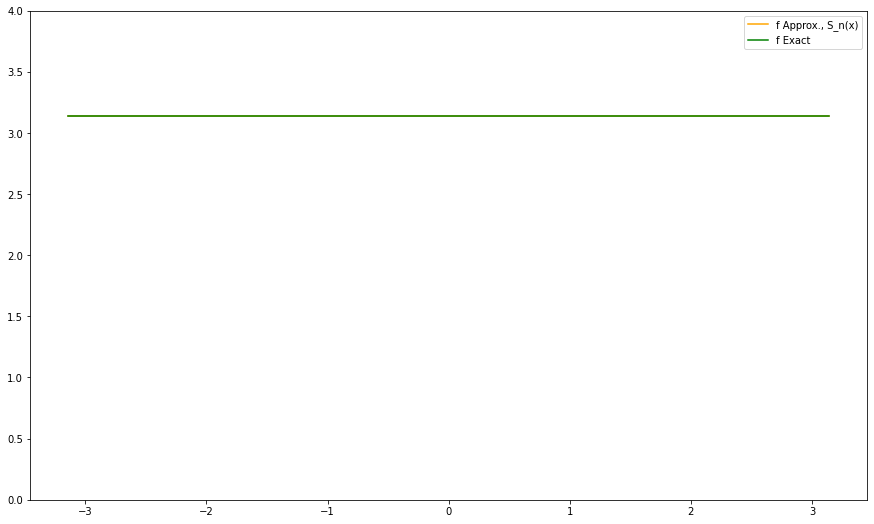

--- end ---


 
------------------------------
Results computed (m = 640)
------------------------------
The error in approximation is :  3.623972233413042e-10


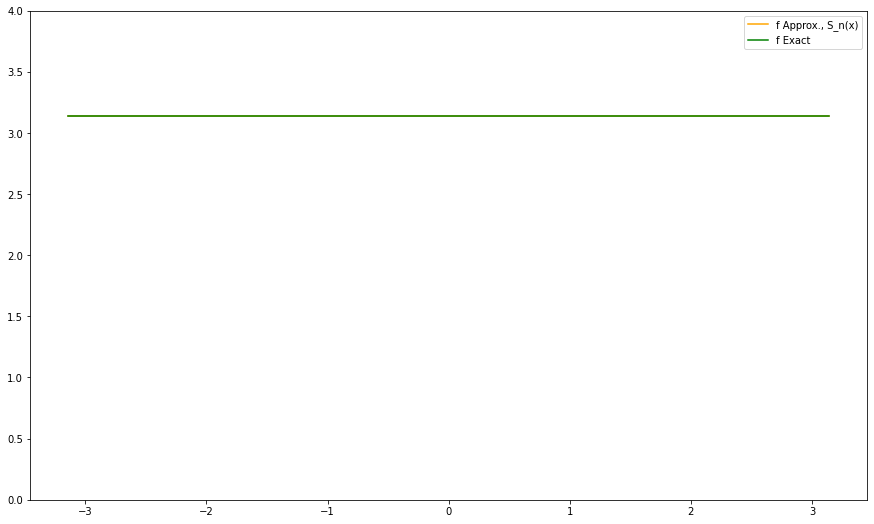

--- end ---


 
------------------------------
Results computed (m = 1280)
------------------------------
The error in approximation is :  6.400946439555355e-10


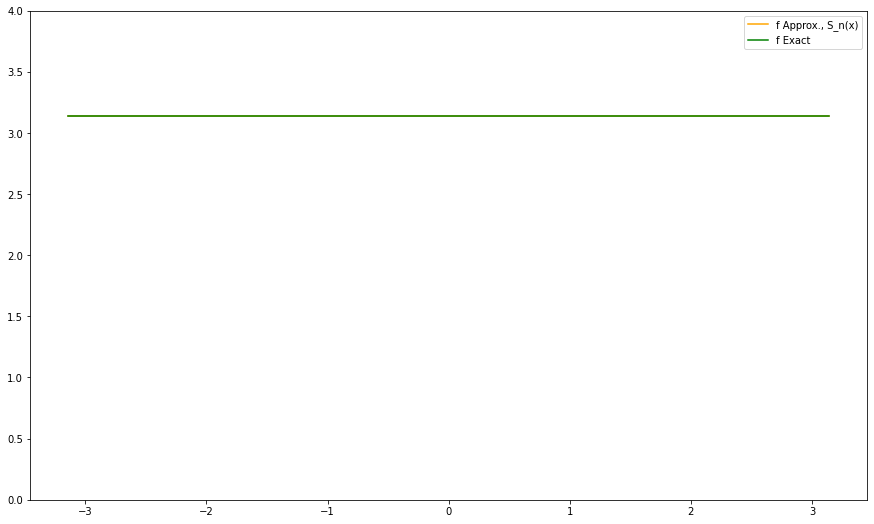

--- end ---


 


In [43]:
# Endpoints considered...

numb = 5
fxn = lambda x: np.pi
apxx = []

# Computation module...
for m in iter:
    apxx.append(results(m, numb, fxn))


The Ratio values E-2N/E-N are:
[2.155982392957183, 2.1108801366049224, 2.100905653741317, 1.9221465162219171, 1.9722908093278464, 1.801795953694688, 1.766279106815057]

 Graph:


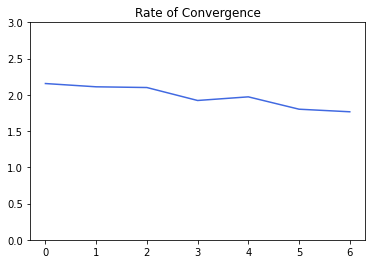

In [12]:
# Plot for convergence...

r_conv(apxx)

------------------------------
Results computed (m = 10)
------------------------------
The error in approximation is :  7.962519532611623e-13


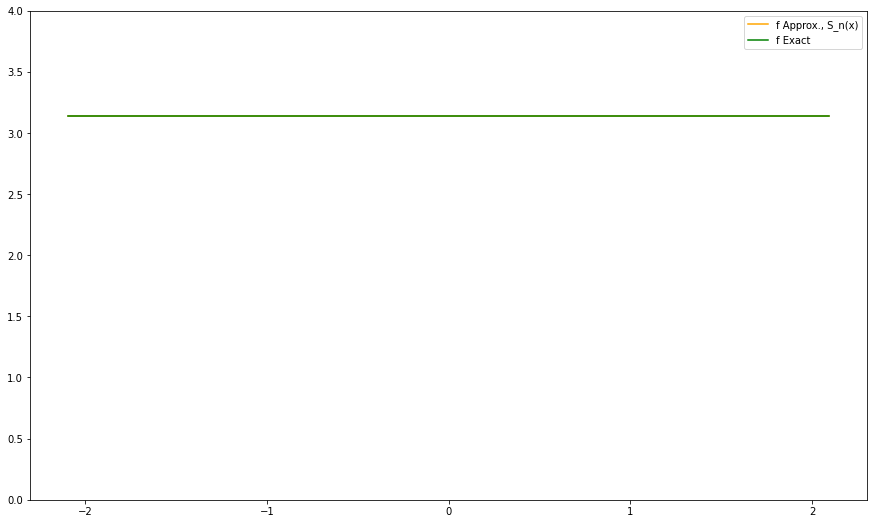

--- end ---


 
------------------------------
Results computed (m = 20)
------------------------------
The error in approximation is :  6.008527009271347e-13


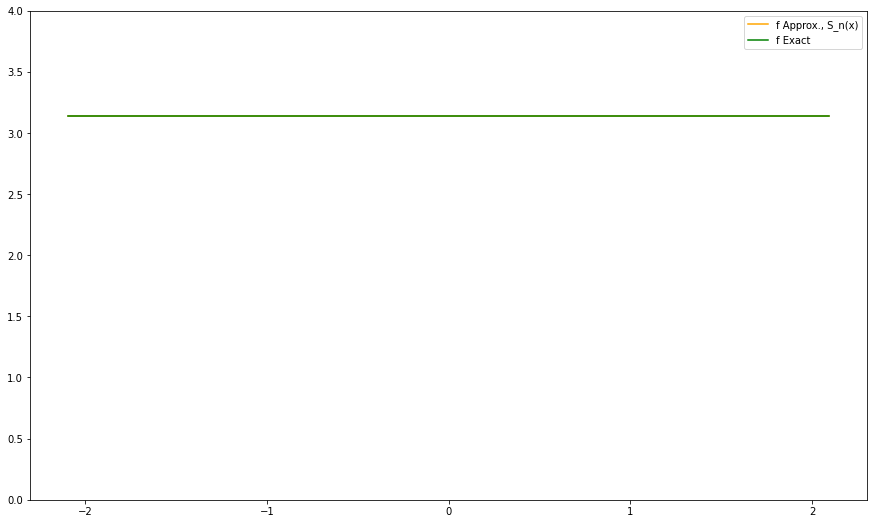

--- end ---


 
------------------------------
Results computed (m = 40)
------------------------------
The error in approximation is :  8.615330671091215e-13


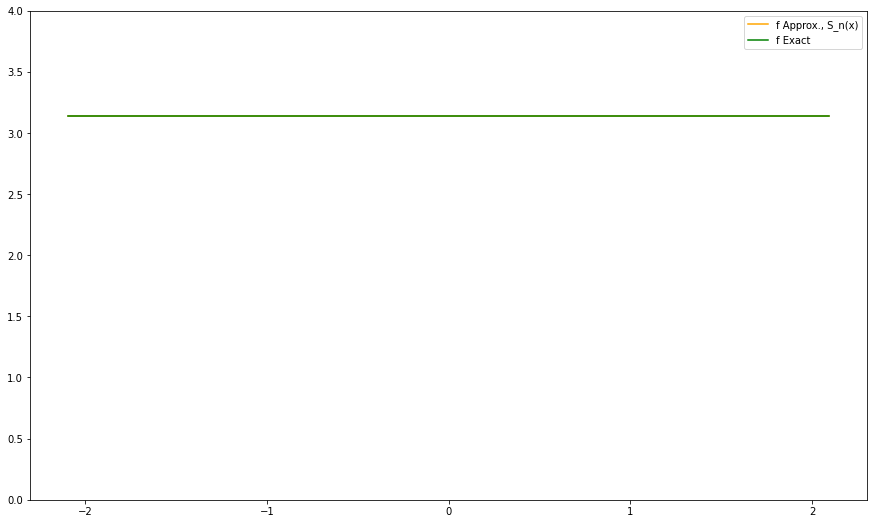

--- end ---


 
------------------------------
Results computed (m = 80)
------------------------------
The error in approximation is :  6.461498003318411e-13


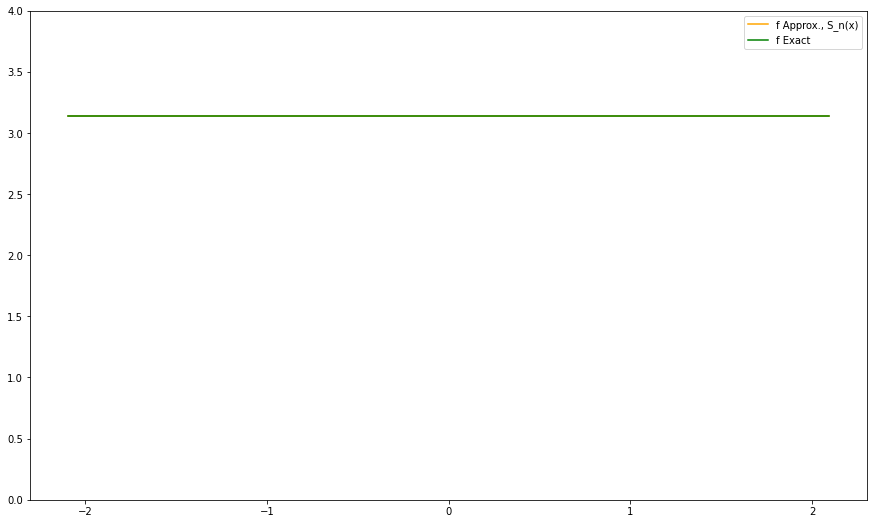

--- end ---


 
------------------------------
Results computed (m = 160)
------------------------------
The error in approximation is :  5.31574784190525e-13


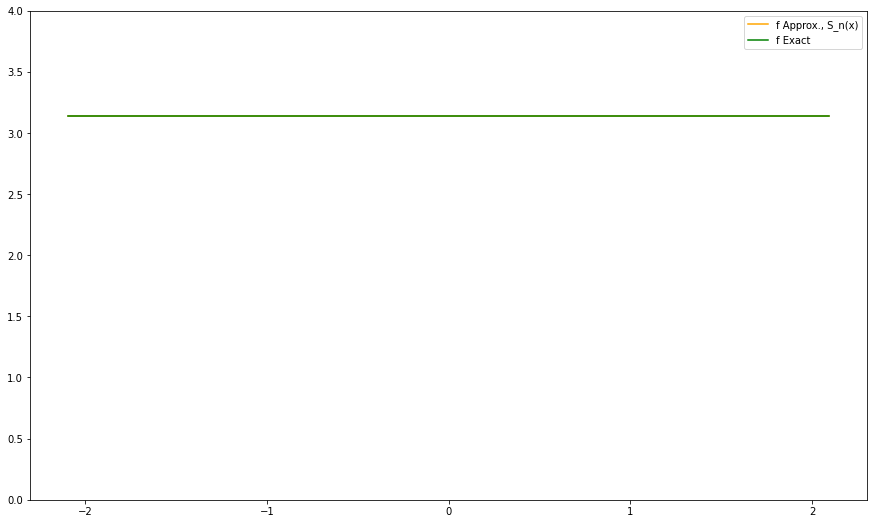

--- end ---


 
------------------------------
Results computed (m = 320)
------------------------------
The error in approximation is :  5.324629626102251e-13


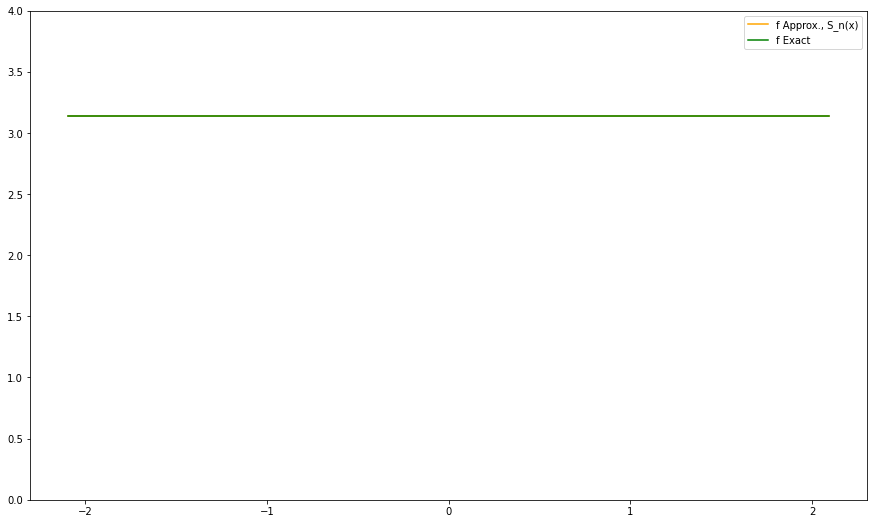

--- end ---


 
------------------------------
Results computed (m = 640)
------------------------------
The error in approximation is :  6.301625887772389e-13


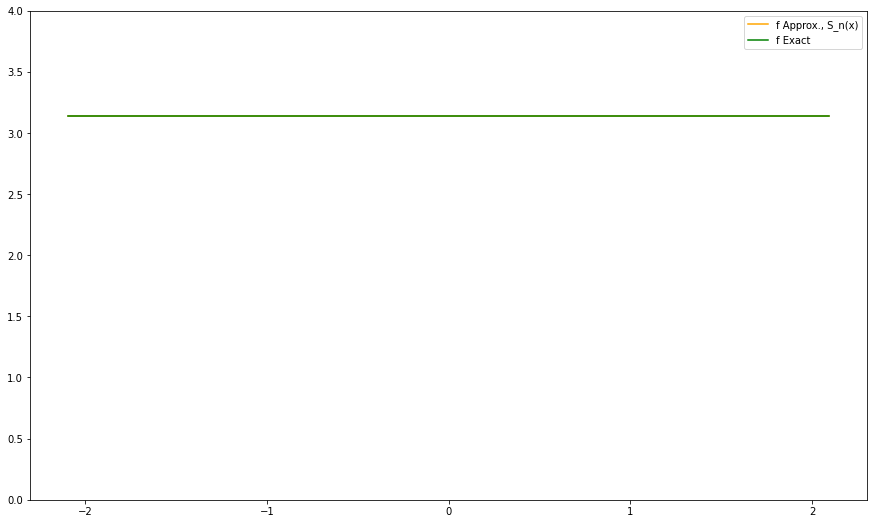

--- end ---


 
------------------------------
Results computed (m = 1280)
------------------------------
The error in approximation is :  1.8283152769527078e-12


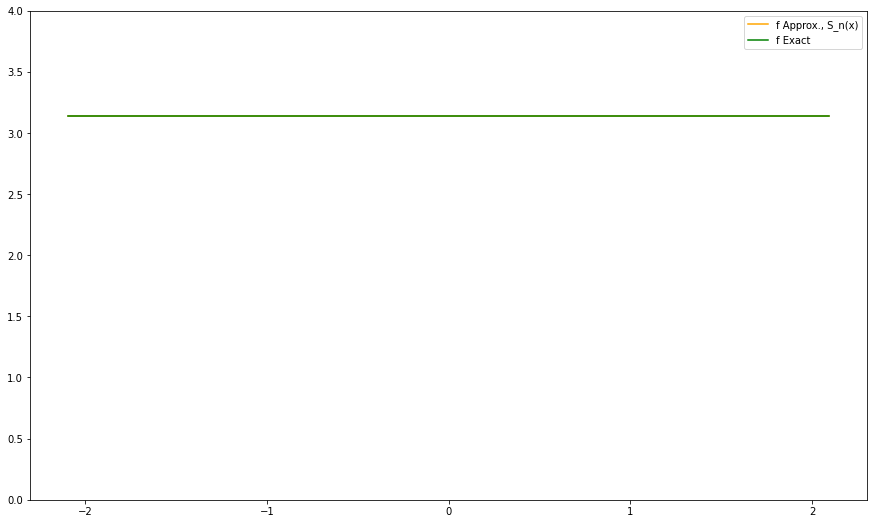

--- end ---


 


In [44]:
# Endpoints not considered...

numb = 5
fxn = lambda x: np.pi
apxx = []

# Computation module...
for m in iter:
    apxx.append(result(m, numb, fxn))


The Ratio values E-2N/E-N are:
[0.754601226993865, 1.433850702143385, 0.75, 0.822680412371134, 1.001670843776107, 1.18348623853211, 2.901338971106413]

 Graph:


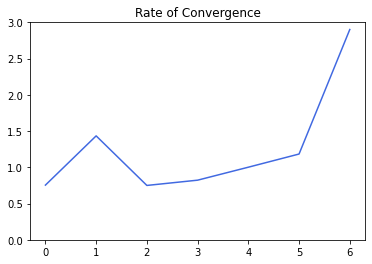

In [14]:
# Plot for convergence...

r_conv(apxx)

### 5.2. Identity Function | $f(x) = x$

------------------------------
Results computed (m = 10)
------------------------------
The error in approximation is :  3.141592653589791


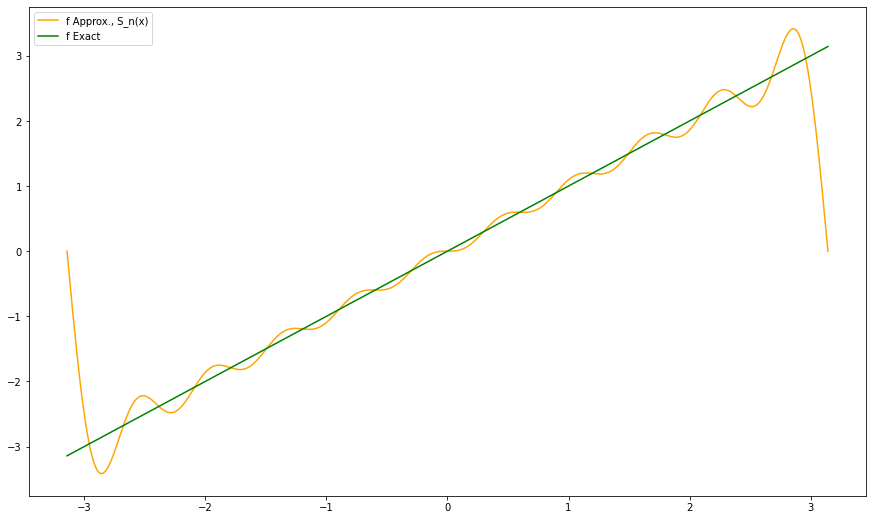

--- end ---


 
------------------------------
Results computed (m = 20)
------------------------------
The error in approximation is :  3.141592653589789


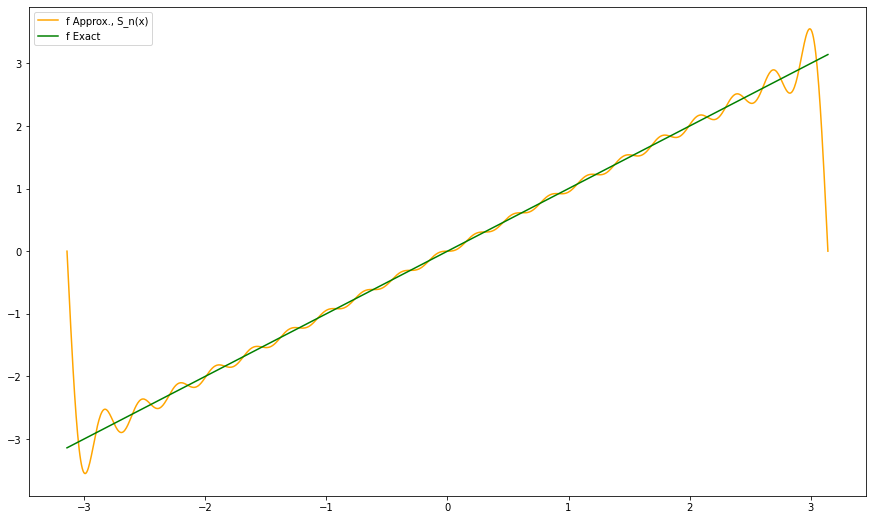

--- end ---


 
------------------------------
Results computed (m = 40)
------------------------------
The error in approximation is :  3.1415926535897856


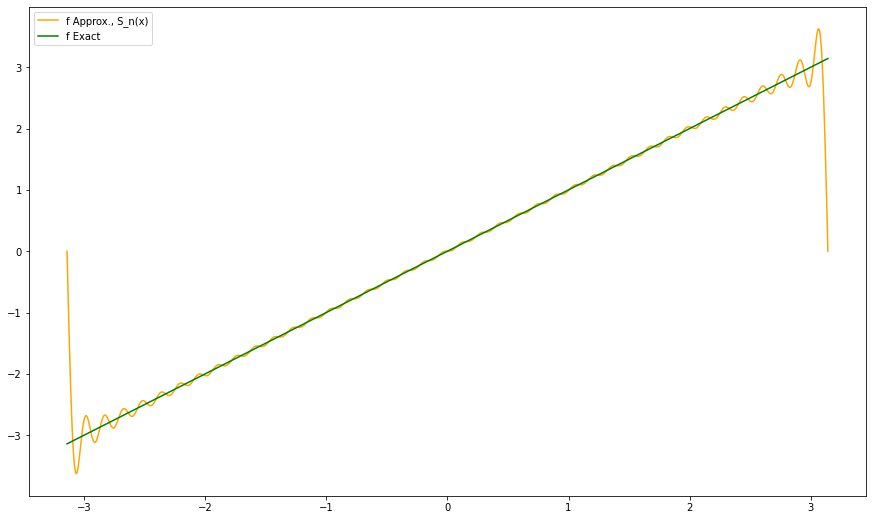

--- end ---


 
------------------------------
Results computed (m = 80)
------------------------------
The error in approximation is :  3.141592653589775


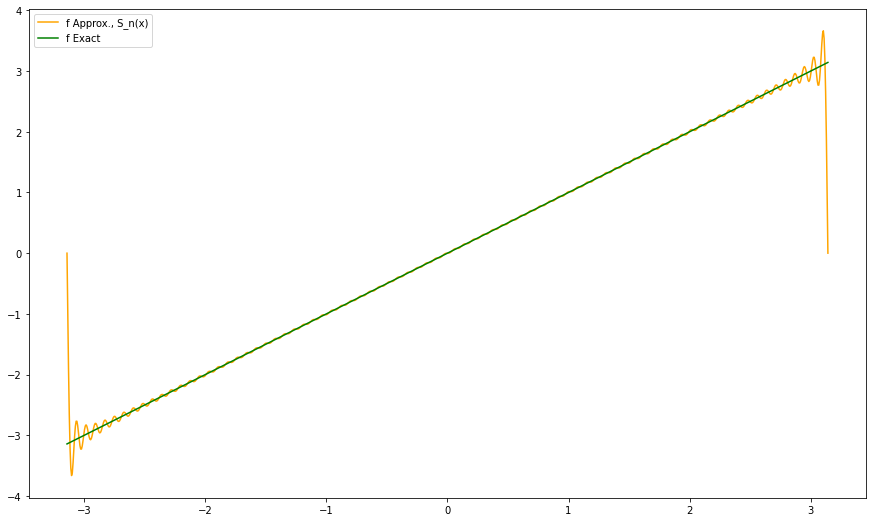

--- end ---


 
------------------------------
Results computed (m = 160)
------------------------------
The error in approximation is :  3.141592653589755


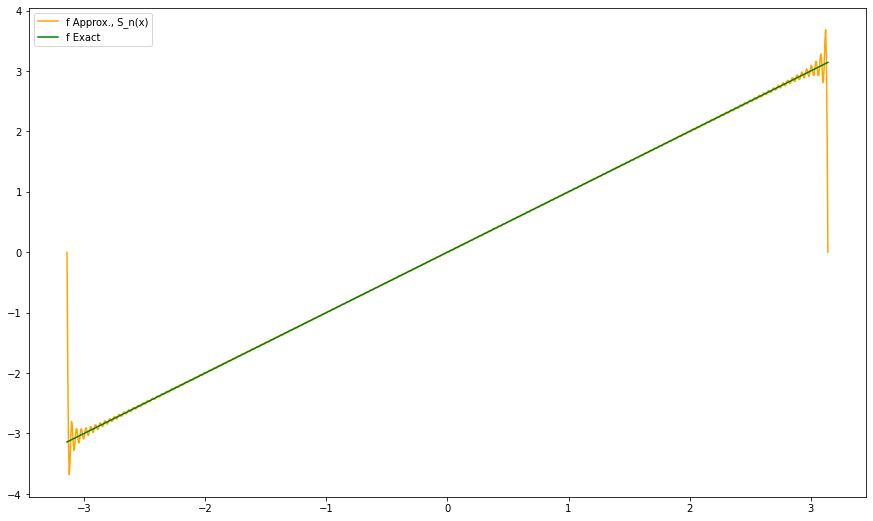

--- end ---


 
------------------------------
Results computed (m = 320)
------------------------------
The error in approximation is :  3.1415926535897256


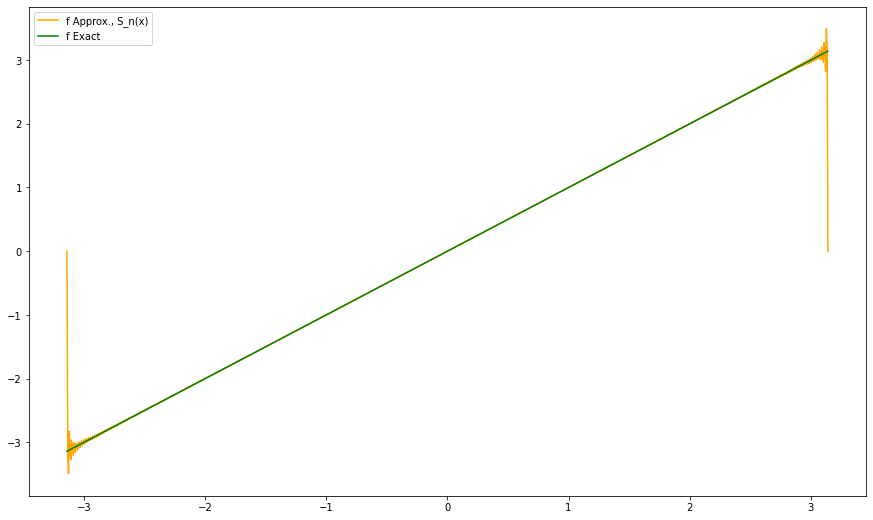

--- end ---


 
------------------------------
Results computed (m = 640)
------------------------------
The error in approximation is :  3.141592653589748


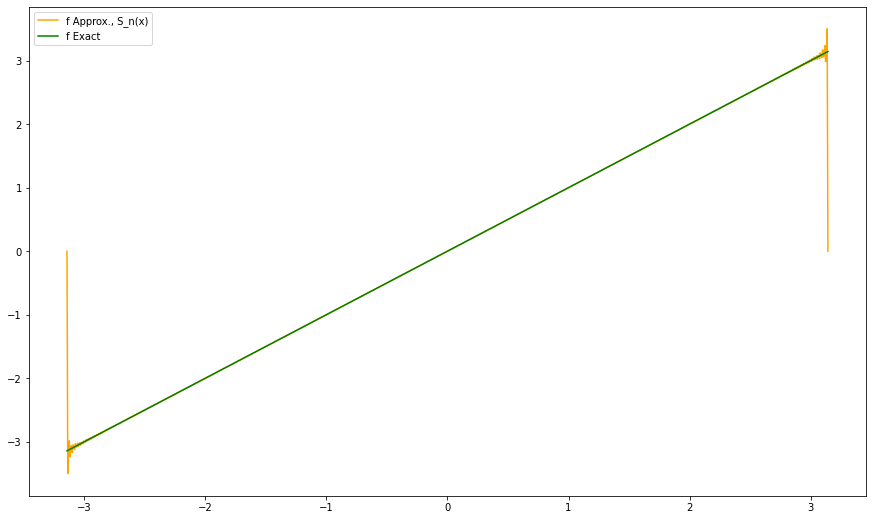

--- end ---


 
------------------------------
Results computed (m = 1280)
------------------------------
The error in approximation is :  3.1415926535897096


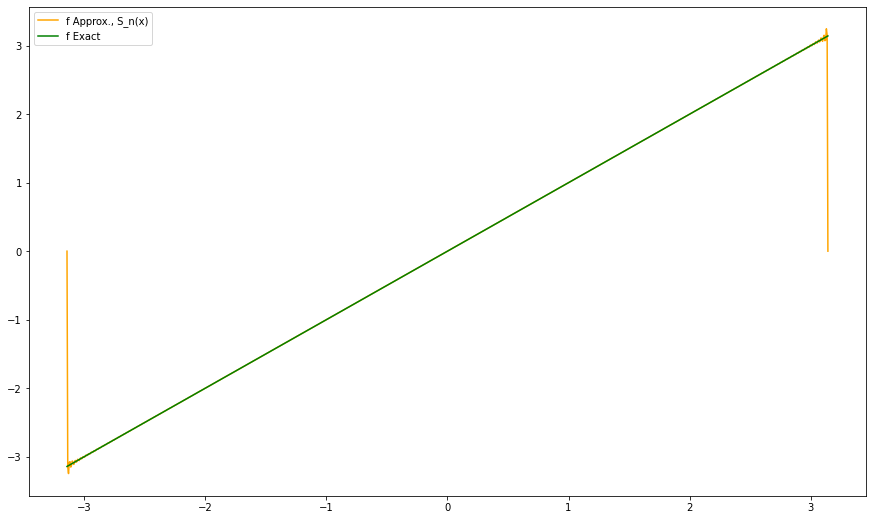

--- end ---


 
The Error Vector is:
[3.141592653589791, 3.141592653589789, 3.1415926535897856, 3.141592653589775, 3.141592653589755, 3.1415926535897256, 3.141592653589748, 3.1415926535897096]


In [15]:
# Endpoints considered...

numb = 1000
fxn = lambda x: x
apxx = []

# Computation module...
for m in iter:
    apxx.append(results(m, numb, fxn))

print("The Error Vector is:")
print(apxx)

The Ratio values E-2N/E-N are:
[0.9999999999999994, 0.9999999999999989, 0.9999999999999966, 0.9999999999999937, 0.9999999999999907, 1.000000000000007, 0.9999999999999879]

 Graph:


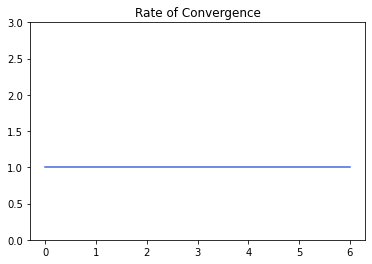

In [16]:
# Plot for convergence...

r_conv(apxx)

------------------------------
Results computed (m = 10)
------------------------------
The error in approximation is :  3.0098093109037416


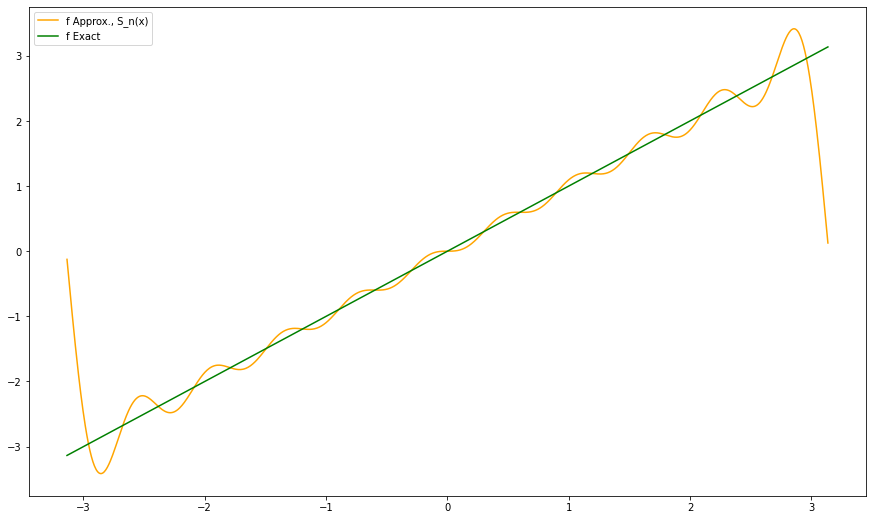

--- end ---


 
------------------------------
Results computed (m = 20)
------------------------------
The error in approximation is :  2.8844758828021058


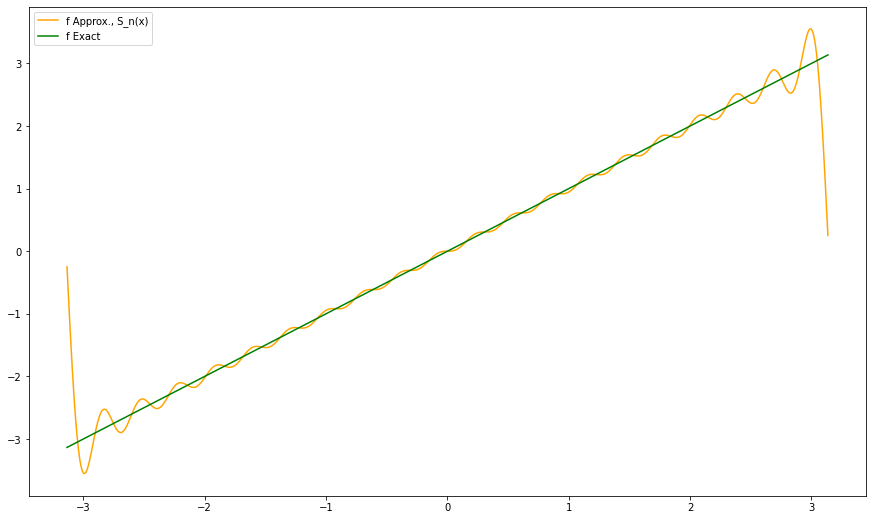

--- end ---


 
------------------------------
Results computed (m = 40)
------------------------------
The error in approximation is :  2.634984669659463


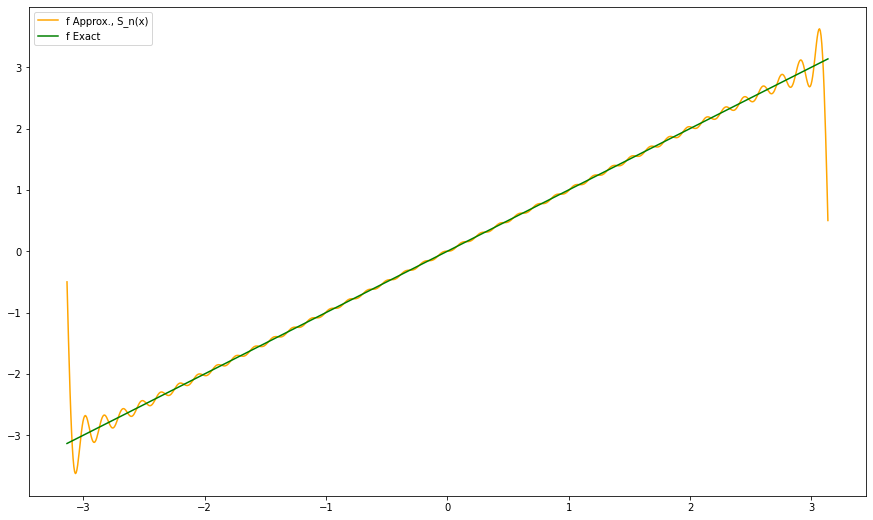

--- end ---


 
------------------------------
Results computed (m = 80)
------------------------------
The error in approximation is :  2.1452350401880245


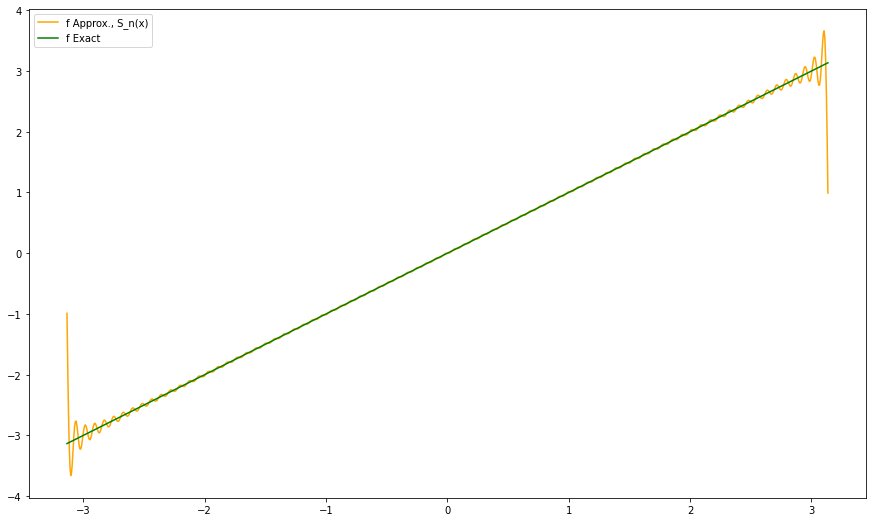

--- end ---


 
------------------------------
Results computed (m = 160)
------------------------------
The error in approximation is :  1.2369147587580462


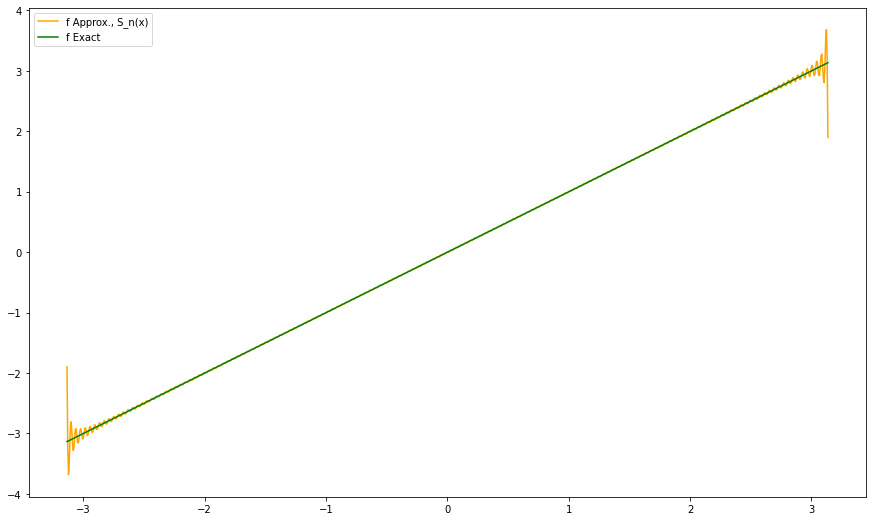

--- end ---


 
------------------------------
Results computed (m = 320)
------------------------------
The error in approximation is :  0.3658602491556895


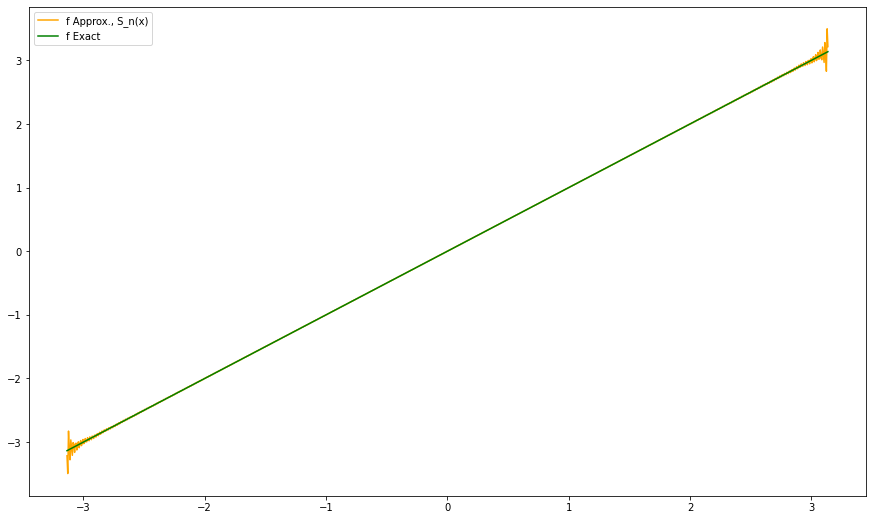

--- end ---


 
------------------------------
Results computed (m = 640)
------------------------------
The error in approximation is :  0.3670623688617325


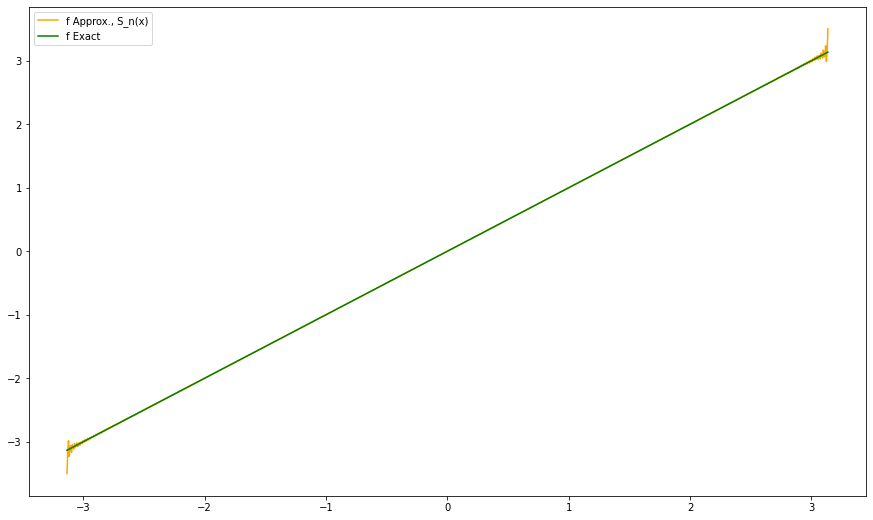

--- end ---


 
------------------------------
Results computed (m = 1280)
------------------------------
The error in approximation is :  0.11797963661955801


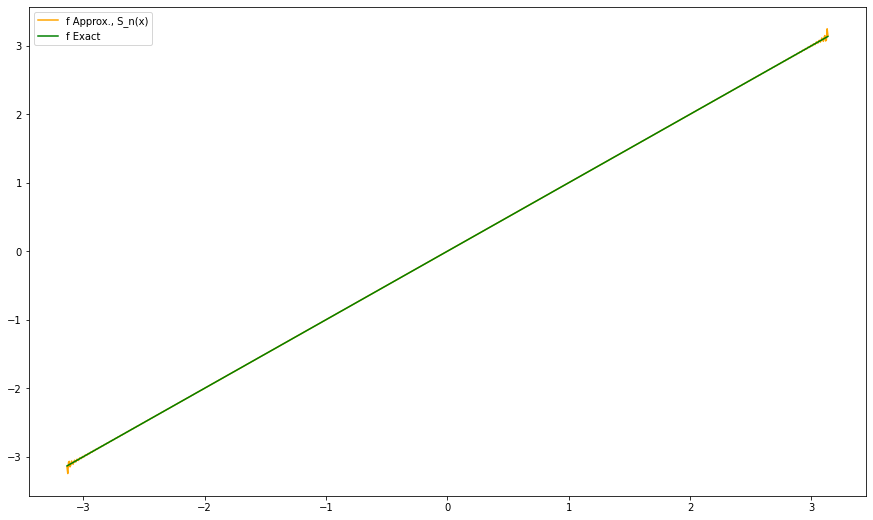

--- end ---


 


In [17]:
# Endpoints not considered...

numb = 1000
fxn = lambda x: x
apxx = []

# Computation module...
for m in iter:
    apxx.append(result(m, numb, fxn))


The Ratio values E-2N/E-N are:
[0.9583583492656541, 0.9135055298502701, 0.814135681656648, 0.5765870571690987, 0.29578452885713824, 1.0032857346727806, 0.32141577733891696]

 Graph:


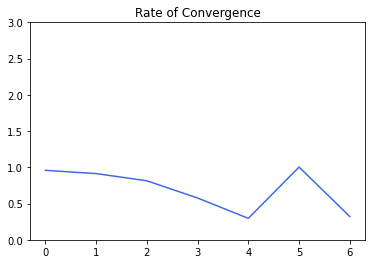

In [18]:
# Plot for convergence...

r_conv(apxx)

### 5.3. Infinitely Differentiable Function, $f \in C^{\infty}[-\pi,\pi]$ | $f(x) = sin(x) + cos(x)$

------------------------------
Results computed (m = 10)
------------------------------
The error in approximation is :  1.7708057242771247e-12


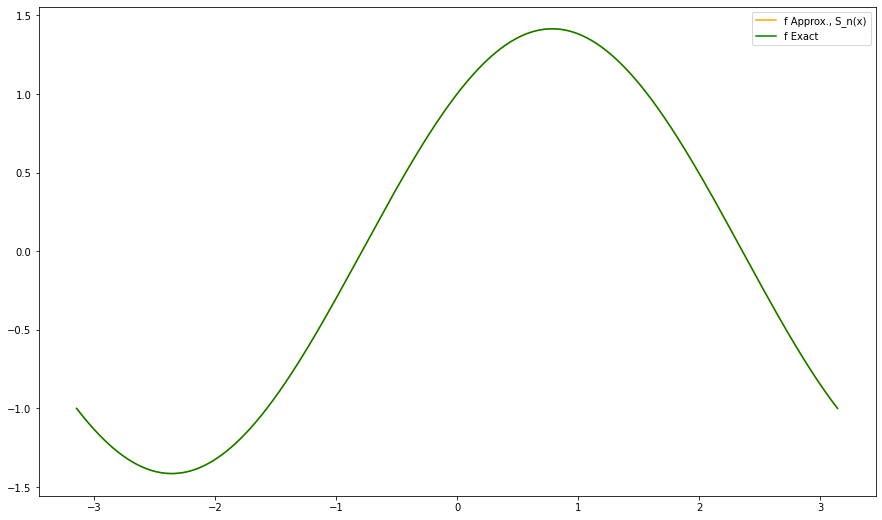

--- end ---


 
------------------------------
Results computed (m = 20)
------------------------------
The error in approximation is :  3.8130609780751e-12


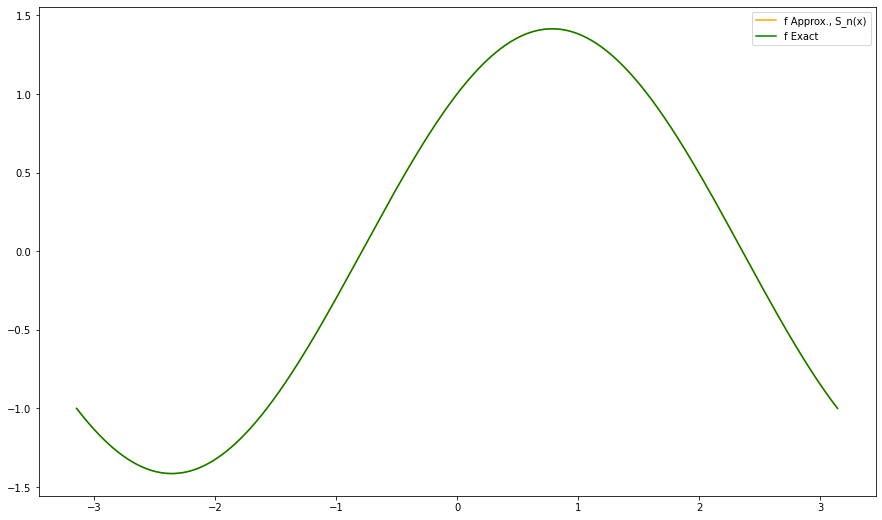

--- end ---


 
------------------------------
Results computed (m = 40)
------------------------------
The error in approximation is :  8.045009103341272e-12


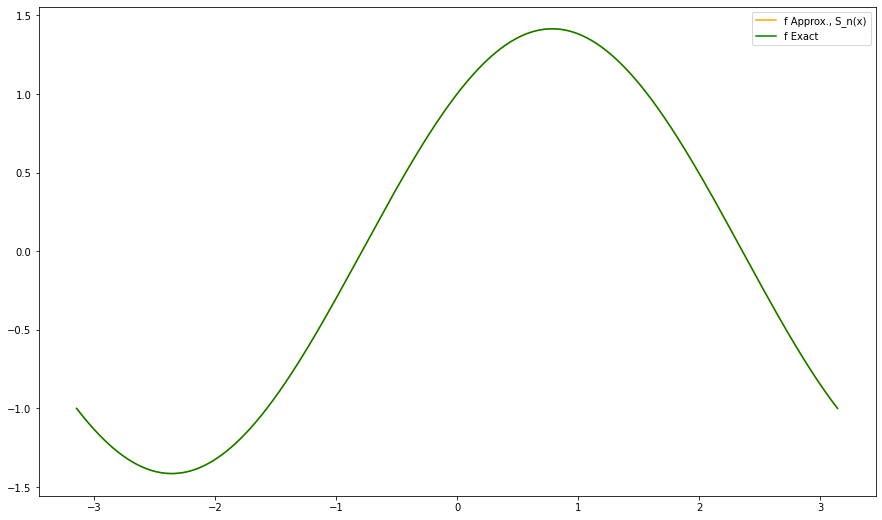

--- end ---


 
------------------------------
Results computed (m = 80)
------------------------------
The error in approximation is :  1.688560402612893e-11


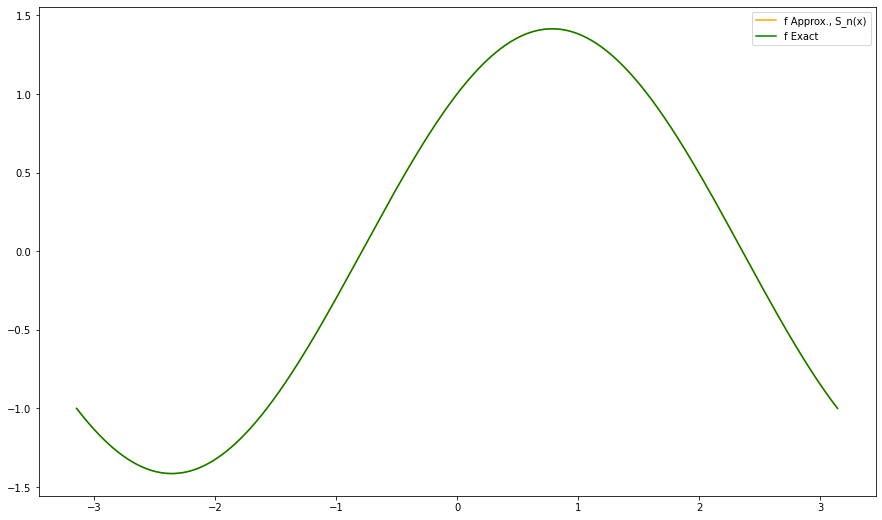

--- end ---


 
------------------------------
Results computed (m = 160)
------------------------------
The error in approximation is :  3.246358737385435e-11


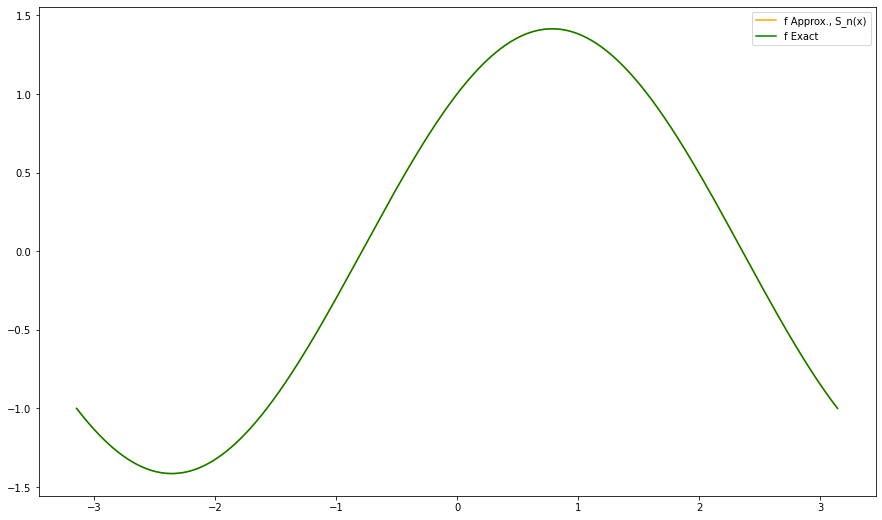

--- end ---


 
------------------------------
Results computed (m = 320)
------------------------------
The error in approximation is :  6.400946439555355e-11


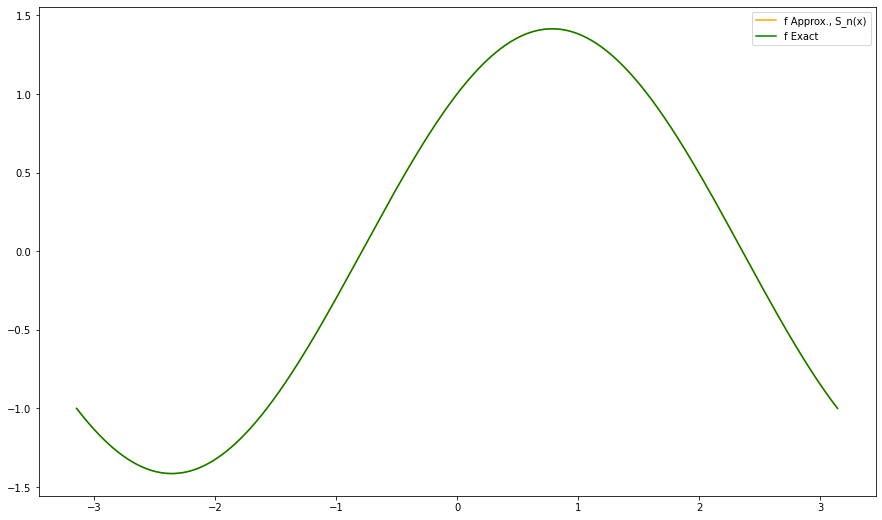

--- end ---


 
------------------------------
Results computed (m = 640)
------------------------------
The error in approximation is :  1.1531864352321008e-10


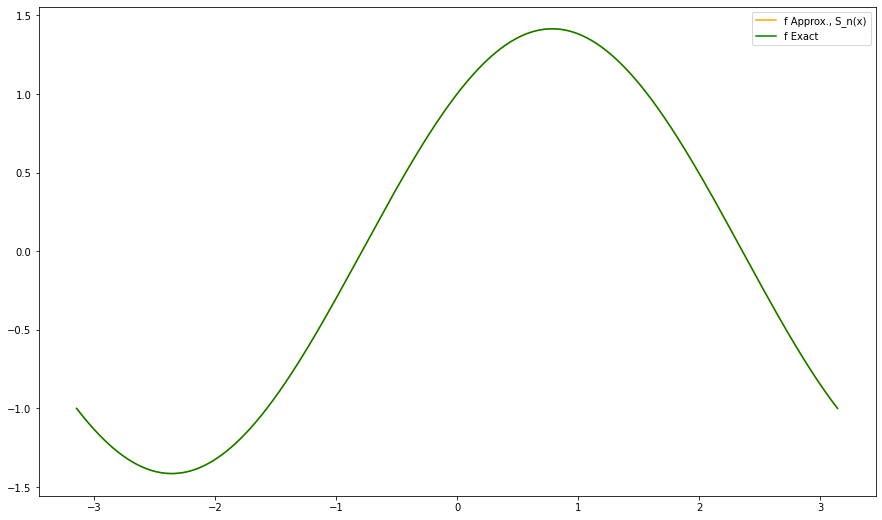

--- end ---


 
------------------------------
Results computed (m = 1280)
------------------------------
The error in approximation is :  2.0372614706332115e-10


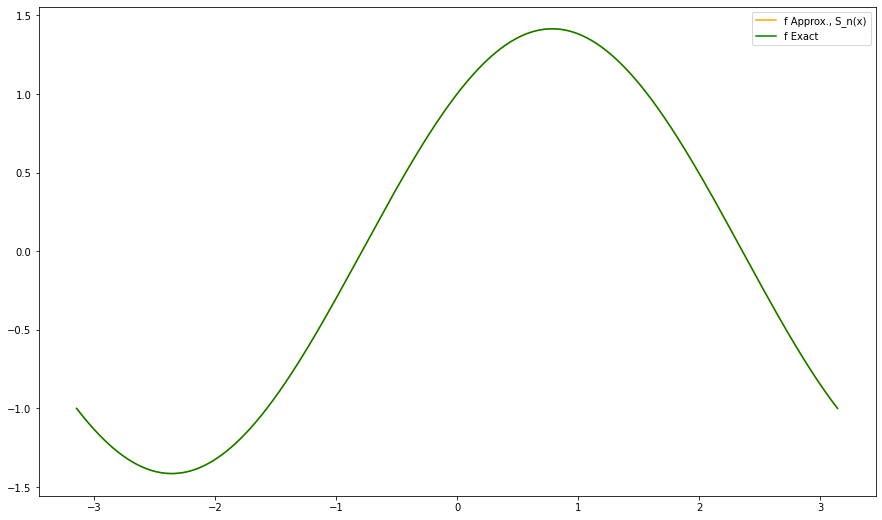

--- end ---


 


In [19]:
# Endpoints considered...

numb = 1000
fxn = lambda x: np.sin(x) + np.cos(x)
apxx = []

# Computation module...
for m in iter:
    apxx.append(results(m, numb, fxn))


The Ratio values E-2N/E-N are:
[2.1532915360501566, 2.109855874217499, 2.0988918482535914, 1.9225600294558556, 1.9717310862294208, 1.8015873841809673, 1.7666366932448123]

 Graph:


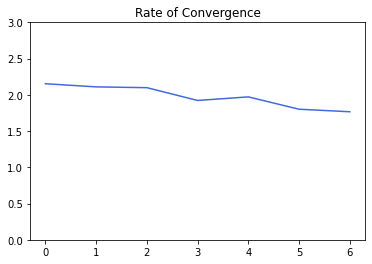

In [20]:
# Plot for convergence...

r_conv(apxx)

------------------------------
Results computed (m = 10)
------------------------------
The error in approximation is :  1.7701395904623496e-12


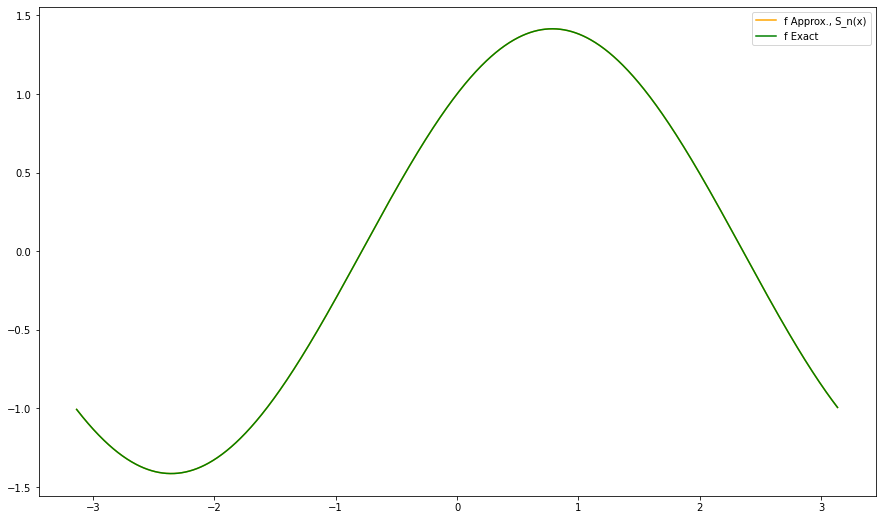

--- end ---


 
------------------------------
Results computed (m = 20)
------------------------------
The error in approximation is :  3.8054004392051866e-12


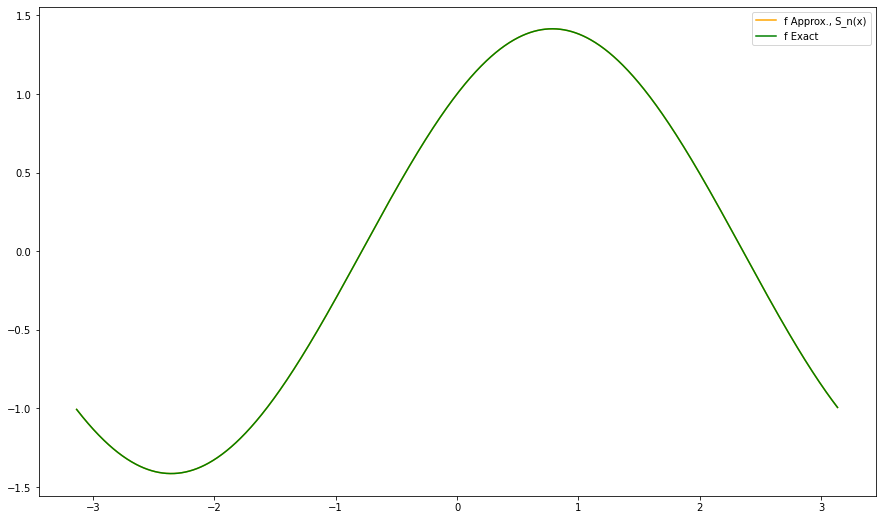

--- end ---


 
------------------------------
Results computed (m = 40)
------------------------------
The error in approximation is :  7.955303082951559e-12


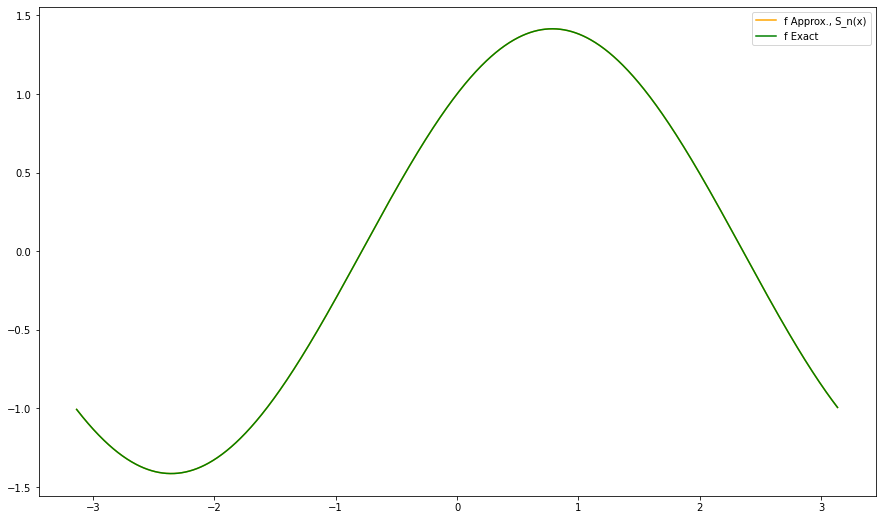

--- end ---


 
------------------------------
Results computed (m = 80)
------------------------------
The error in approximation is :  1.6141310510420226e-11


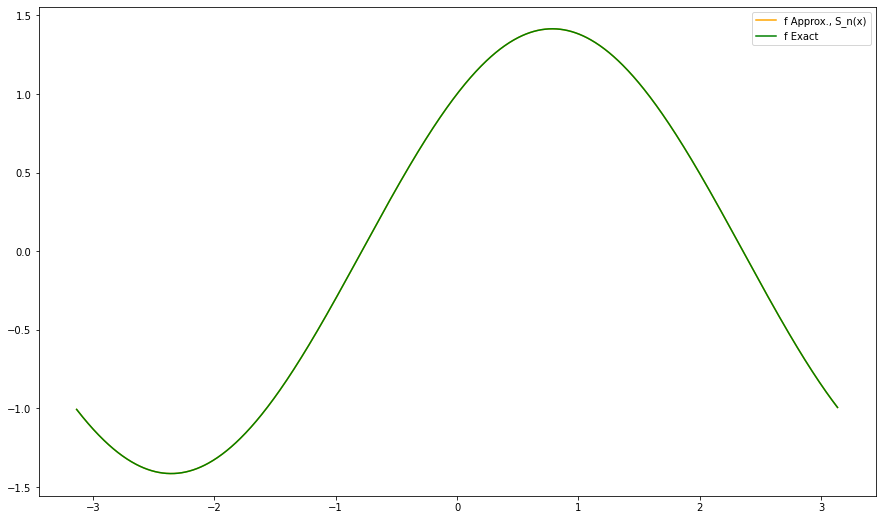

--- end ---


 
------------------------------
Results computed (m = 160)
------------------------------
The error in approximation is :  2.750999428258183e-11


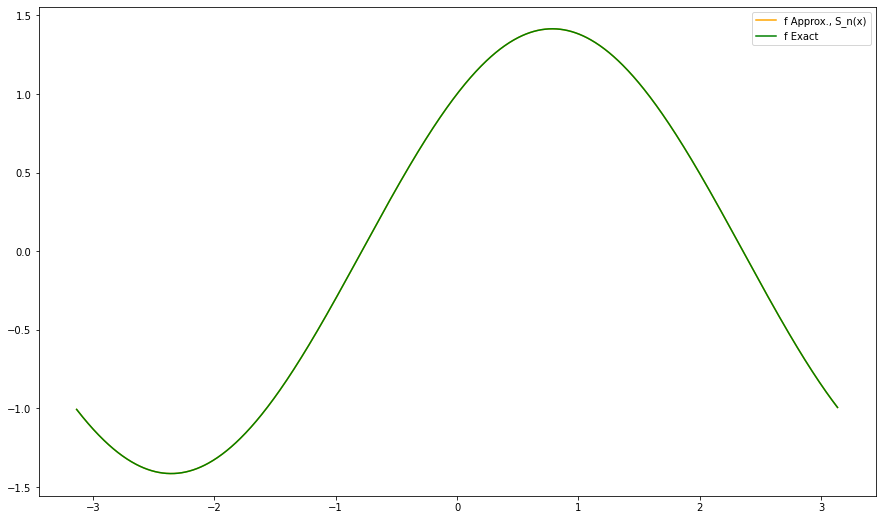

--- end ---


 
------------------------------
Results computed (m = 320)
------------------------------
The error in approximation is :  2.911915153447353e-11


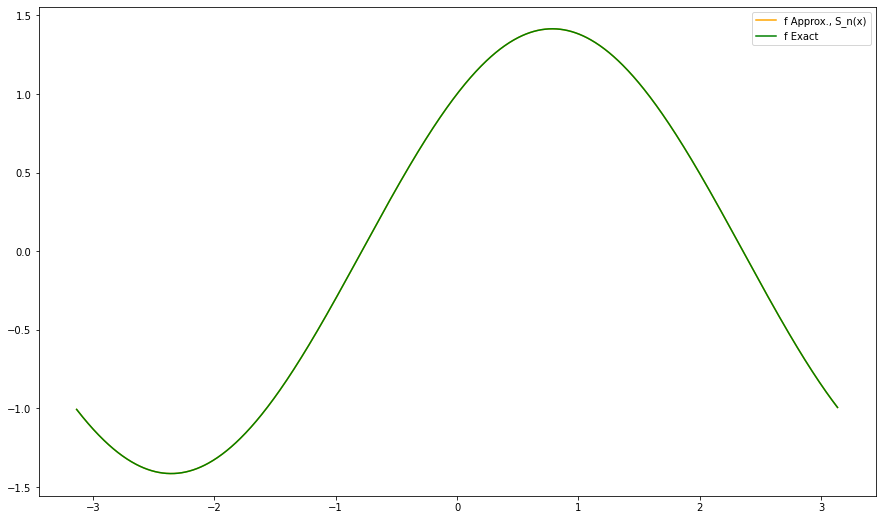

--- end ---


 
------------------------------
Results computed (m = 640)
------------------------------
The error in approximation is :  1.3998469050591211e-11


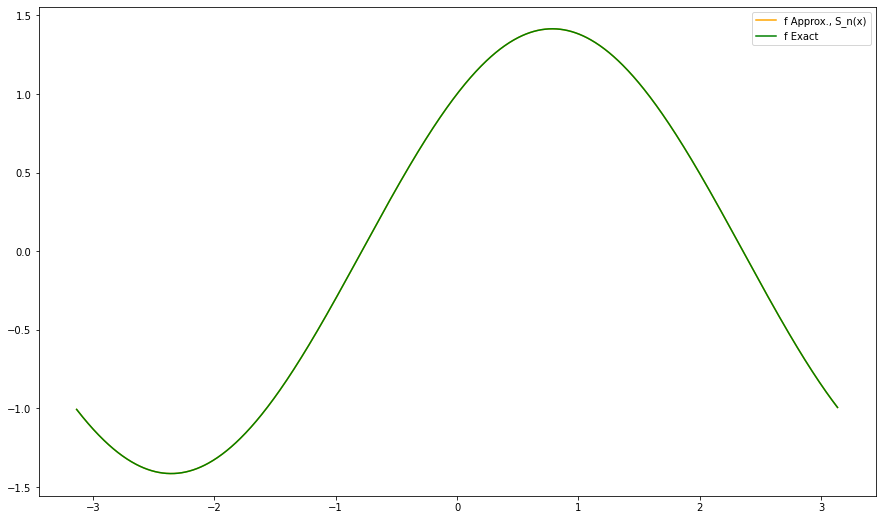

--- end ---


 
------------------------------
Results computed (m = 1280)
------------------------------
The error in approximation is :  2.532463128090967e-11


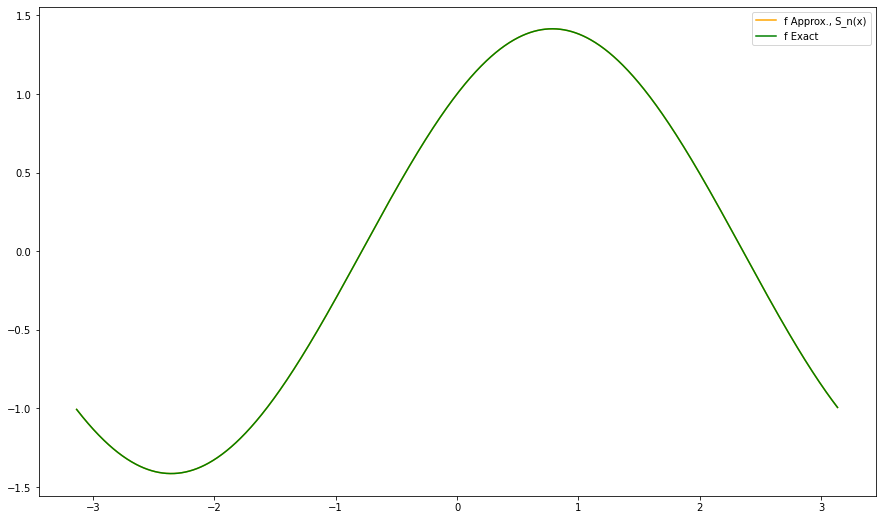

--- end ---


 


In [21]:
# Endpoints not considered...

numb = 1000
fxn = lambda x: np.sin(x) + np.cos(x)
apxx = []

# Computation module...
for m in iter:
    apxx.append(result(m, numb, fxn))


The Ratio values E-2N/E-N are:
[2.149774209734069, 2.0905298167814212, 2.0290000697788013, 1.7043222274190442, 1.0584935509387057, 0.4807306639418641, 1.8091000658275636]

 Graph:


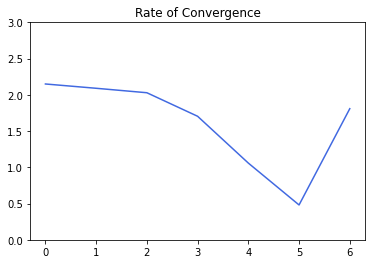

In [22]:
# Plot for convergence...

r_conv(apxx)

### 5.4. One-time Differentiable Function, $f \in C^{1}[-\pi,\pi]$ | $f(x) = |x|^{\frac{3}{2}}$

------------------------------
Results computed (m = 10)
------------------------------
The error in approximation is :  0.16191723110329637


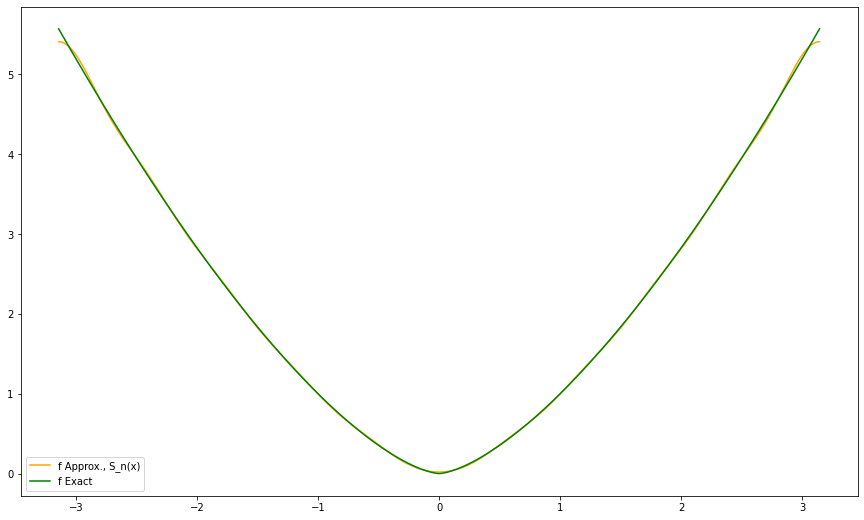

--- end ---


 
------------------------------
Results computed (m = 20)
------------------------------
The error in approximation is :  0.08270646623998434


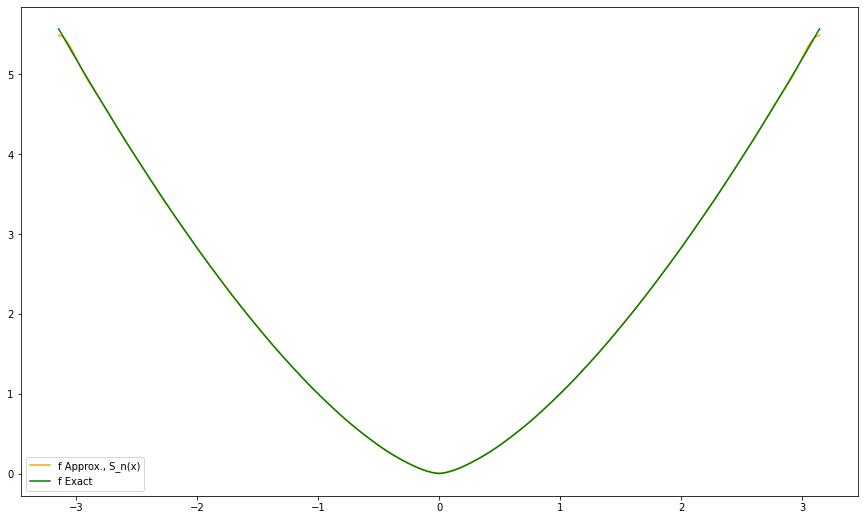

--- end ---


 
------------------------------
Results computed (m = 40)
------------------------------
The error in approximation is :  0.04181855562378267


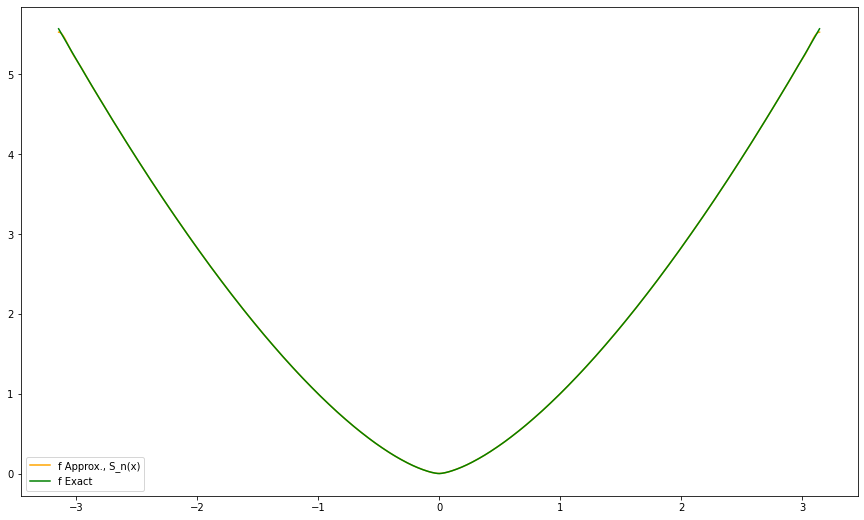

--- end ---


 
------------------------------
Results computed (m = 80)
------------------------------
The error in approximation is :  0.021030598761045738


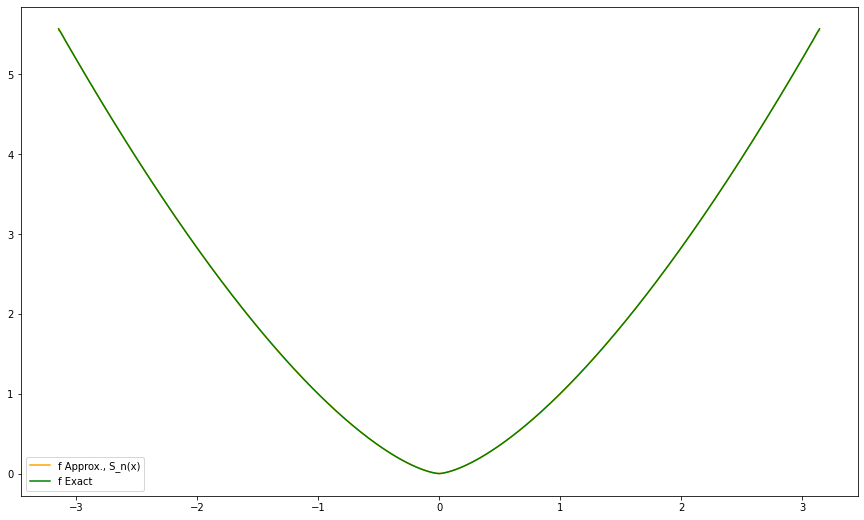

--- end ---


 
------------------------------
Results computed (m = 160)
------------------------------
The error in approximation is :  0.010546483551755692


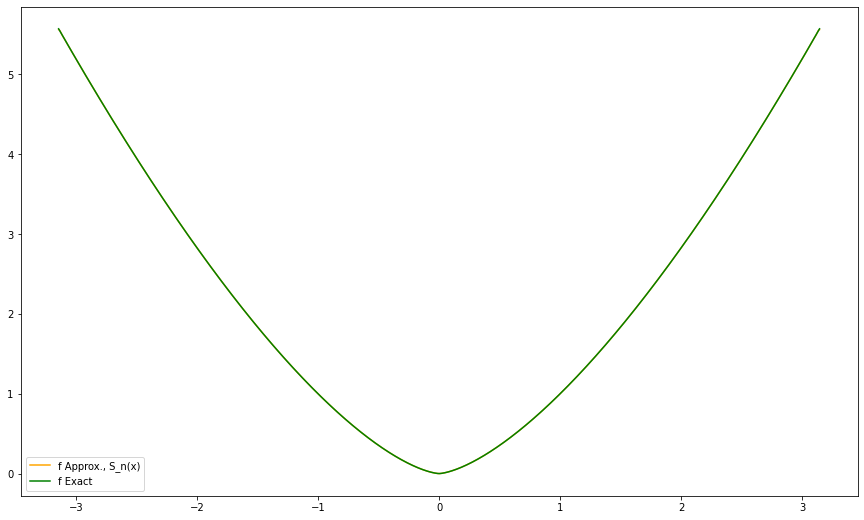

--- end ---


 
------------------------------
Results computed (m = 320)
------------------------------
The error in approximation is :  0.005281182307354193


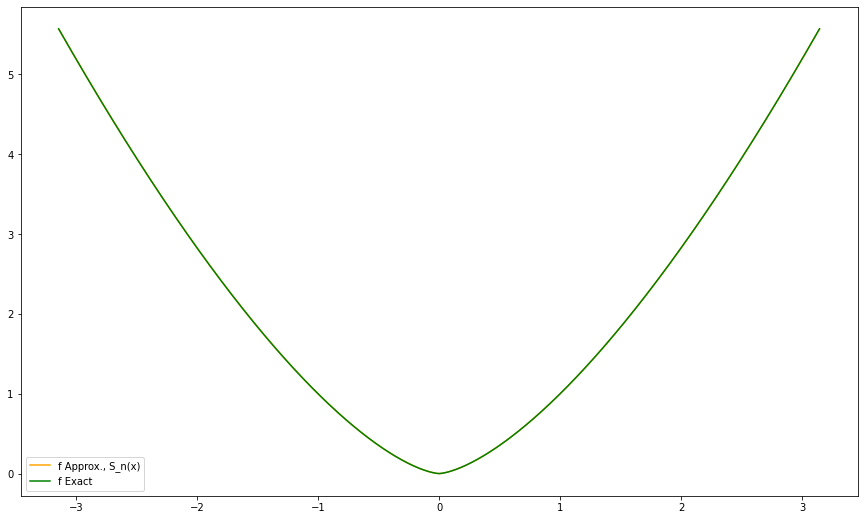

--- end ---


 
------------------------------
Results computed (m = 640)
------------------------------
The error in approximation is :  0.002642599531082368


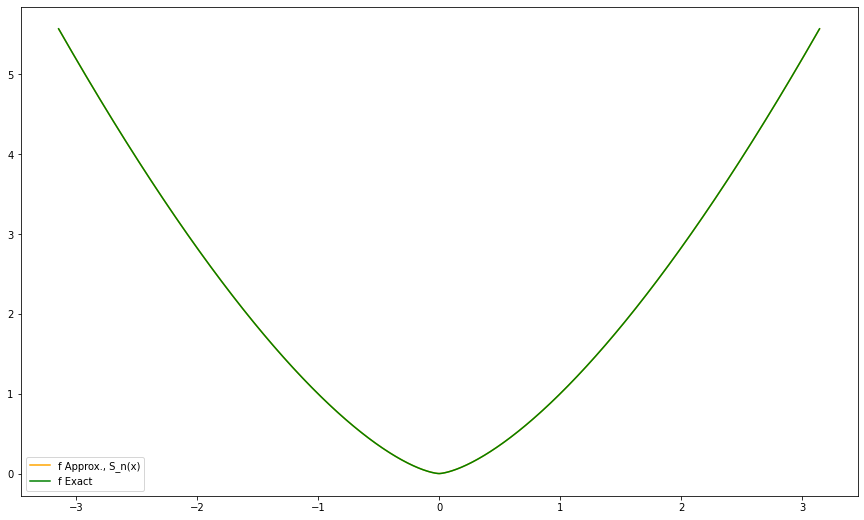

--- end ---


 
------------------------------
Results computed (m = 1280)
------------------------------
The error in approximation is :  0.0013217964481011535


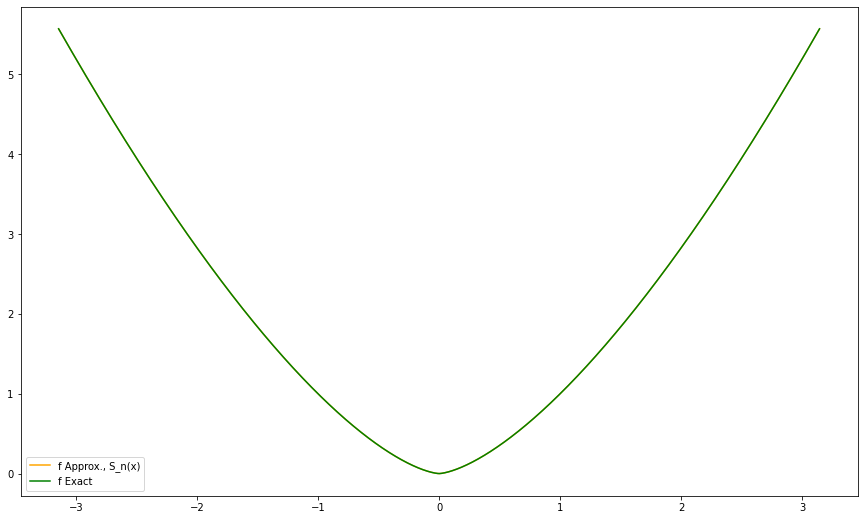

--- end ---


 


In [23]:
# Endpoints considered...

numb = 1000
fxn = lambda x: pow((abs(x)),(3 / 2))
apxx = []

# Computation module...
for m in iter:
    apxx.append(results(m, numb, fxn))


The Ratio values E-2N/E-N are:
[0.5107947170071178, 0.5056261925450943, 0.5029011271992715, 0.501482799970992, 0.50075290796571, 0.5003802893534796, 0.5001879522622052]

 Graph:


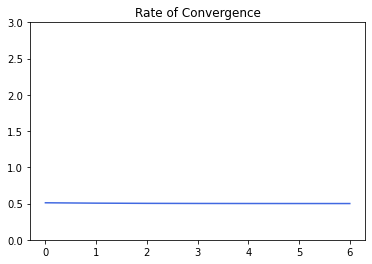

In [24]:
# Plot for convergence...

r_conv(apxx)

------------------------------
Results computed (m = 10)
------------------------------
The error in approximation is :  0.145577103004225


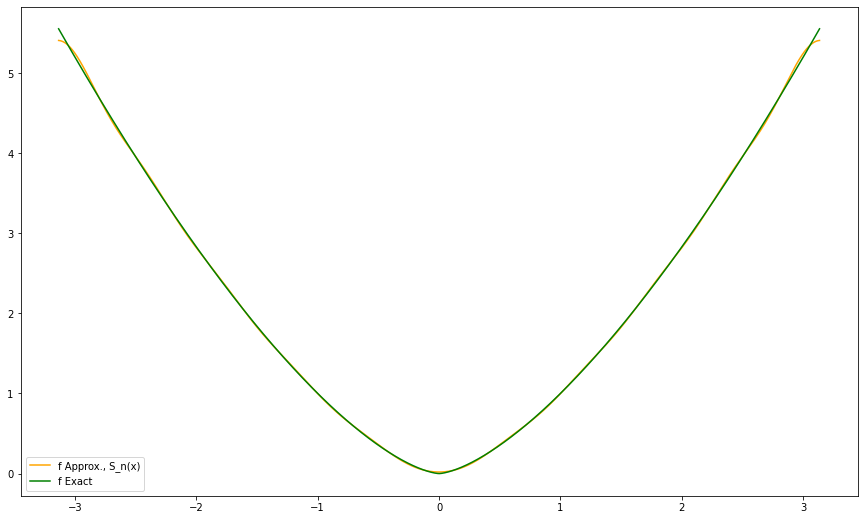

--- end ---


 
------------------------------
Results computed (m = 20)
------------------------------
The error in approximation is :  0.06670005484925667


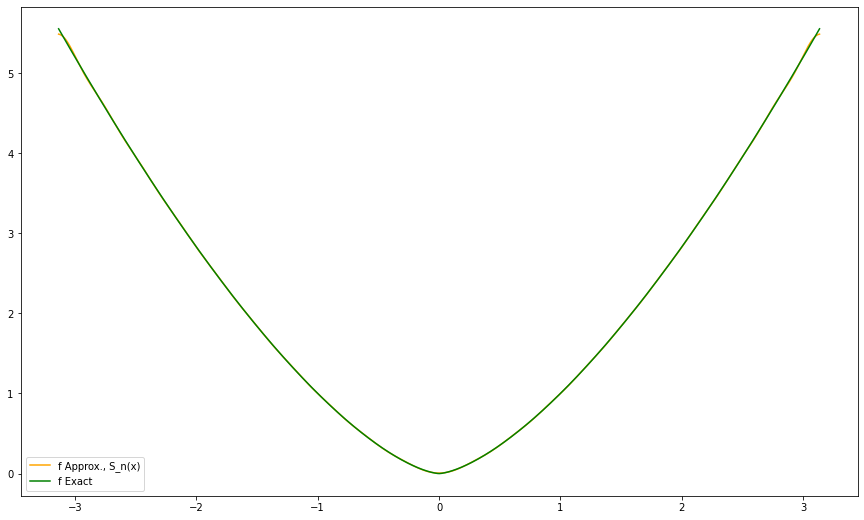

--- end ---


 
------------------------------
Results computed (m = 40)
------------------------------
The error in approximation is :  0.02647730152965977


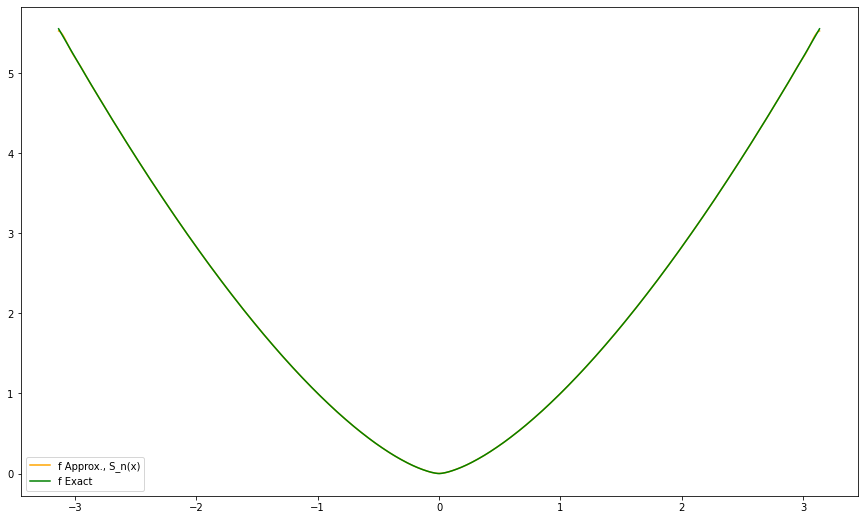

--- end ---


 
------------------------------
Results computed (m = 80)
------------------------------
The error in approximation is :  0.007278954135436777


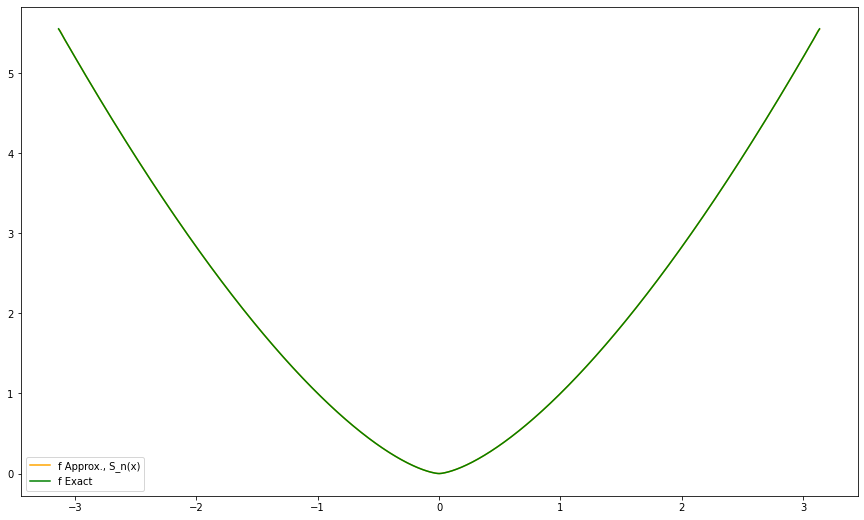

--- end ---


 
------------------------------
Results computed (m = 160)
------------------------------
The error in approximation is :  0.0036528590838651454


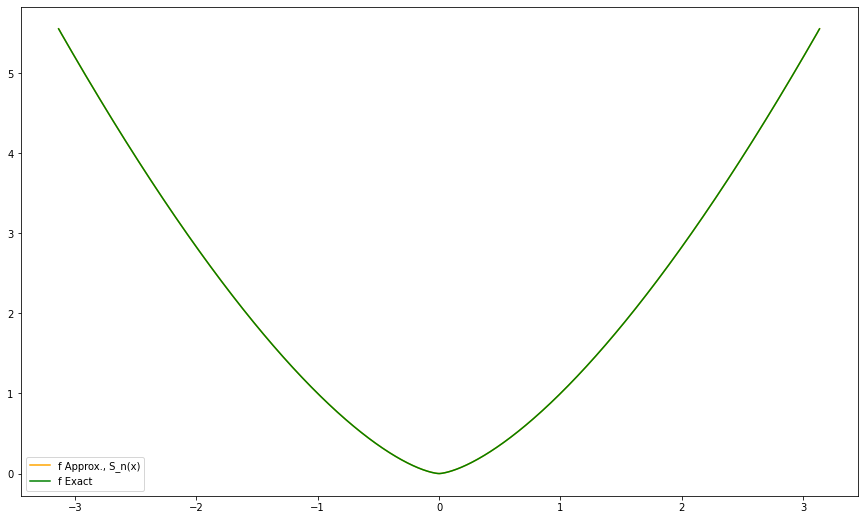

--- end ---


 
------------------------------
Results computed (m = 320)
------------------------------
The error in approximation is :  0.0018298168384376368


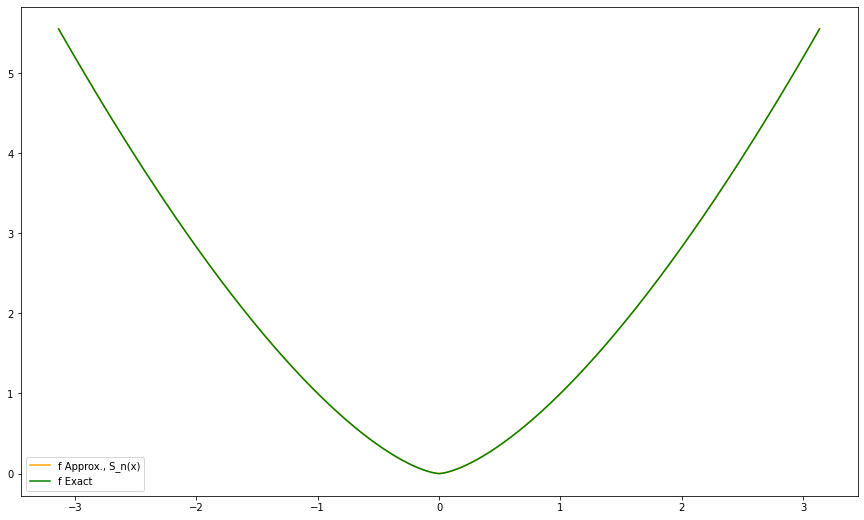

--- end ---


 
------------------------------
Results computed (m = 640)
------------------------------
The error in approximation is :  0.00031218946862310304


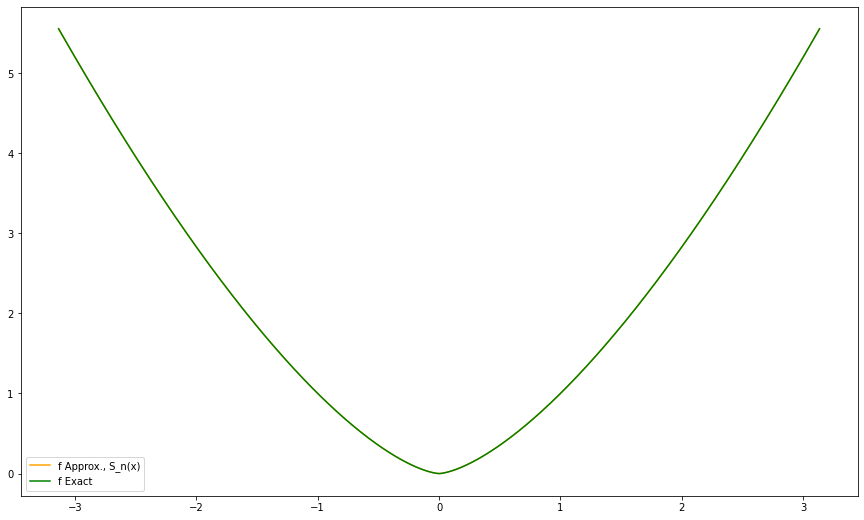

--- end ---


 
------------------------------
Results computed (m = 1280)
------------------------------
The error in approximation is :  0.00015618512104520477


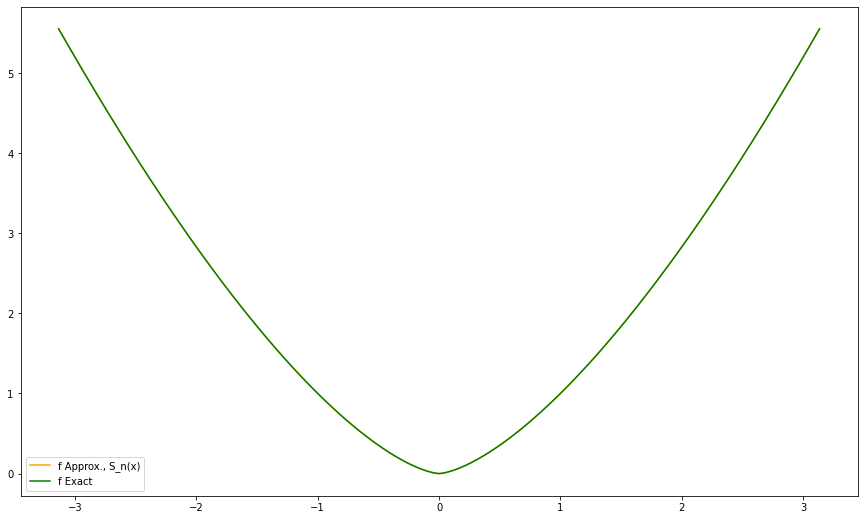

--- end ---


 


In [25]:
# Endpoints not considered...

numb = 1000
fxn = lambda x: pow((abs(x)),(3 / 2))
apxx = []

# Computation module...
for m in iter:
    apxx.append(result(m, numb, fxn))


The Ratio values E-2N/E-N are:
[0.4581768250143079, 0.3969607159918976, 0.2749129901807751, 0.5018384531483181, 0.5009273000757204, 0.17061241434943927, 0.5002895252490479]

 Graph:


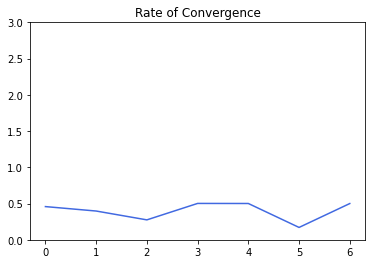

In [26]:
# Plot for convergence...

r_conv(apxx)

### 5.5. Continuous but not Differentiable Functions, $f \in C^{0}[-\pi,\pi]$ | $f(x) = |x|$

------------------------------
Results computed (m = 10)
------------------------------
The error in approximation is :  0.06345254078516227


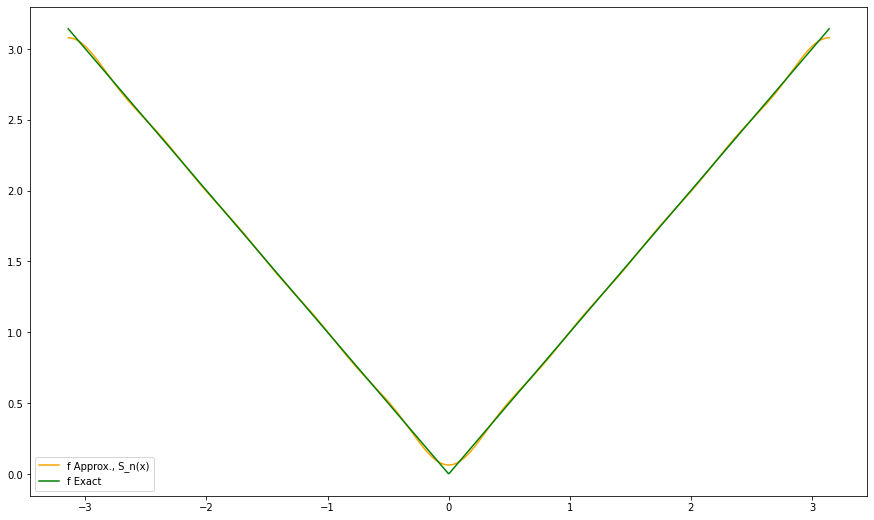

--- end ---


 
------------------------------
Results computed (m = 20)
------------------------------
The error in approximation is :  0.03180444316276798


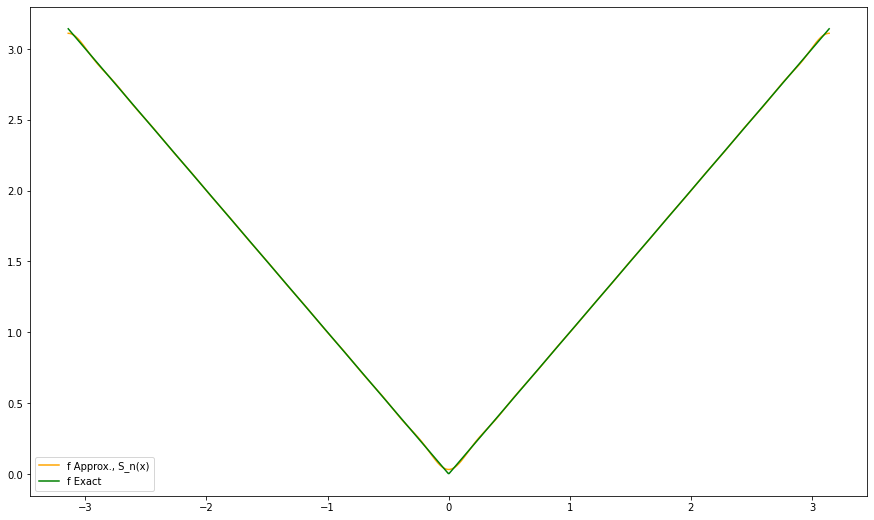

--- end ---


 
------------------------------
Results computed (m = 40)
------------------------------
The error in approximation is :  0.01591206964124625


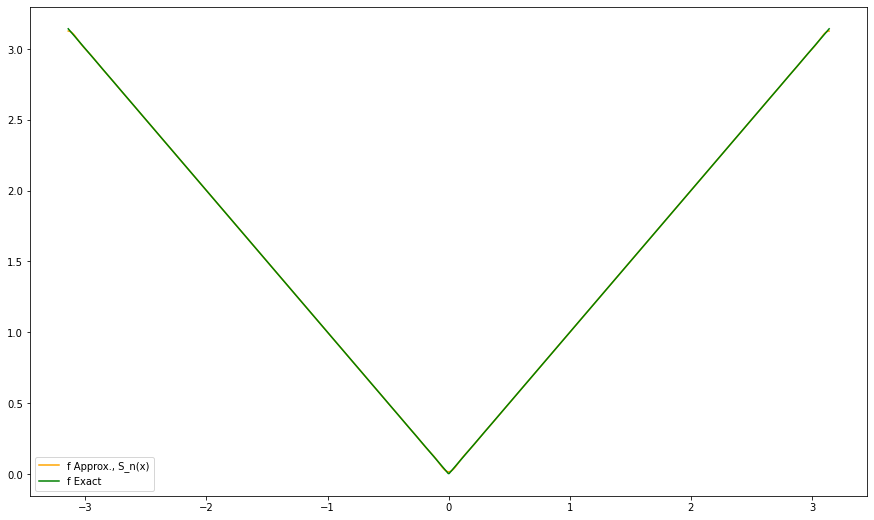

--- end ---


 
------------------------------
Results computed (m = 80)
------------------------------
The error in approximation is :  0.007957220571671364


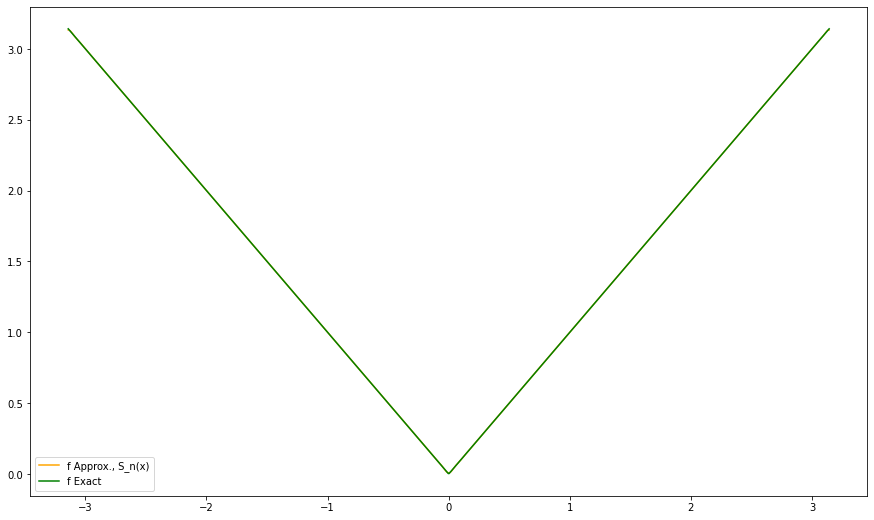

--- end ---


 
------------------------------
Results computed (m = 160)
------------------------------
The error in approximation is :  0.003978708006437515


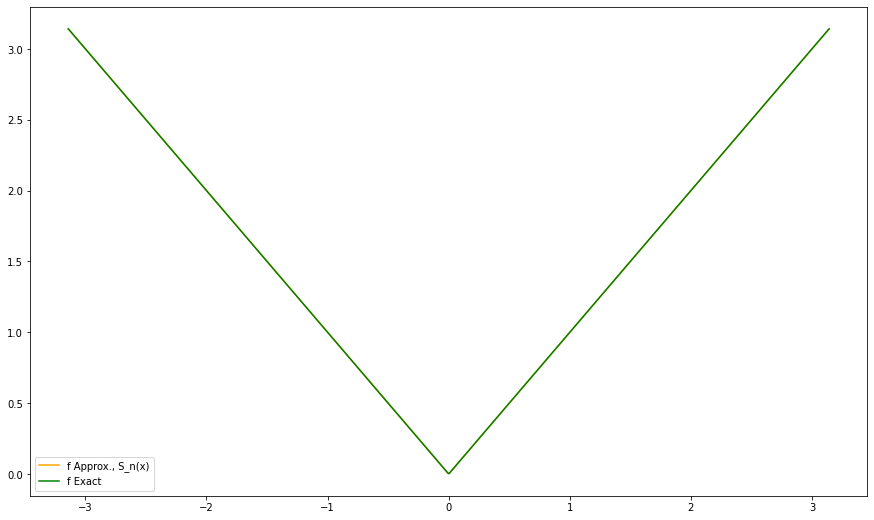

--- end ---


 
------------------------------
Results computed (m = 320)
------------------------------
The error in approximation is :  0.001989309997063593


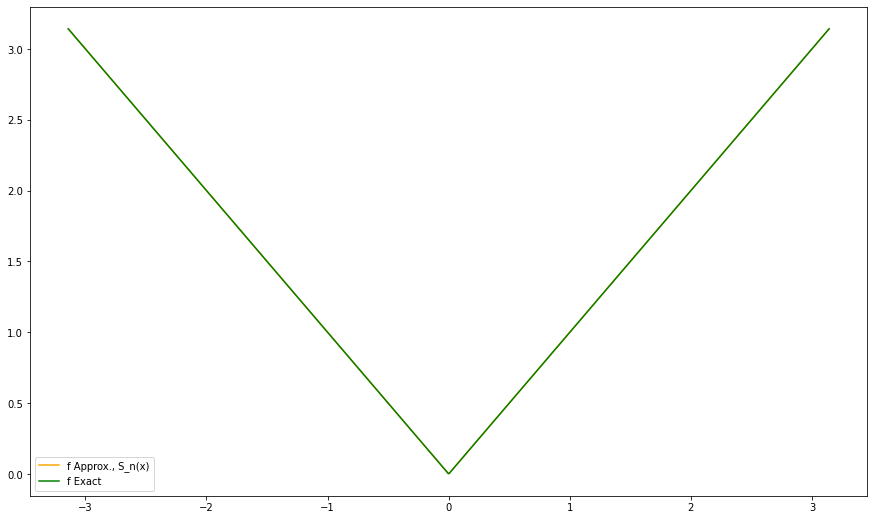

--- end ---


 
------------------------------
Results computed (m = 640)
------------------------------
The error in approximation is :  0.0009945665922499458


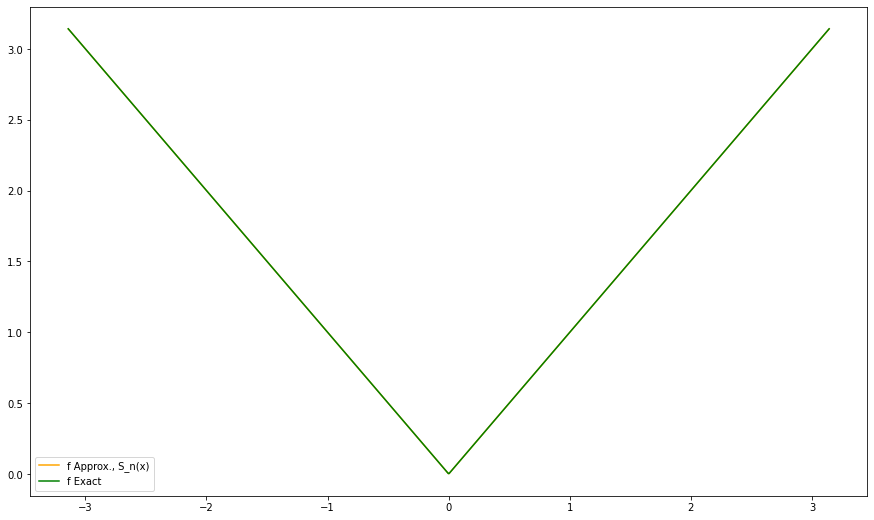

--- end ---


 
------------------------------
Results computed (m = 1280)
------------------------------
The error in approximation is :  0.0004969589339052227


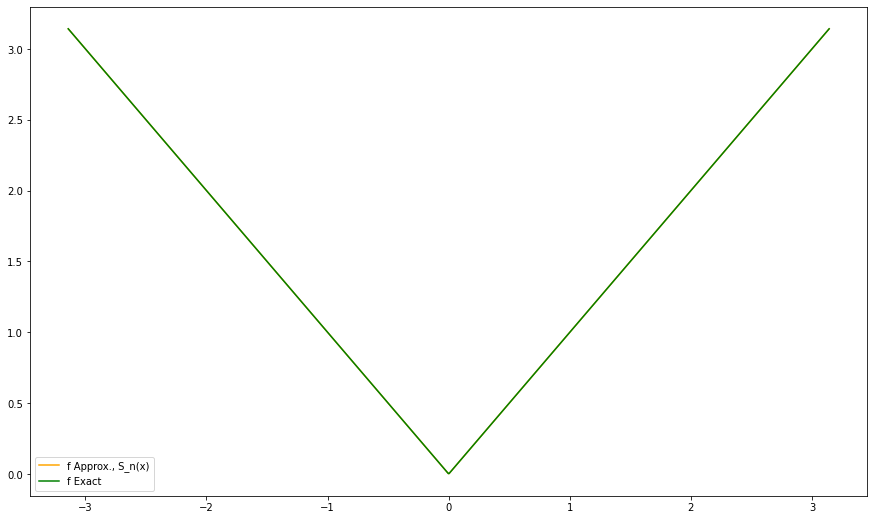

--- end ---


 


In [27]:
# Endpoints considered...

numb = 1000
fxn = lambda x: abs(x)
apxx = []

# Computation module...
for m in iter:
    apxx.append(results(m, numb, fxn))


The Ratio values E-2N/E-N are:
[0.5012319880215912, 0.500309644152921, 0.500074518970503, 0.5000122807456389, 0.4999889395866464, 0.49995555932359403, 0.4996738657599423]

 Graph:


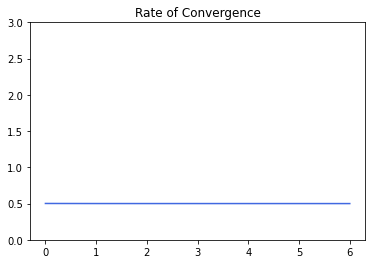

In [28]:
# Plot for convergence...

r_conv(apxx)

------------------------------
Results computed (m = 10)
------------------------------
The error in approximation is :  0.060347896532325696


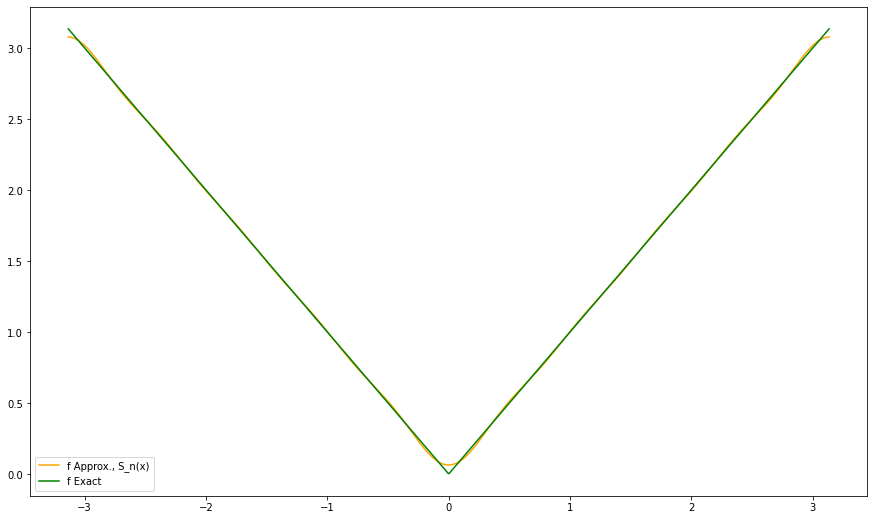

--- end ---


 
------------------------------
Results computed (m = 20)
------------------------------
The error in approximation is :  0.028733378309464673


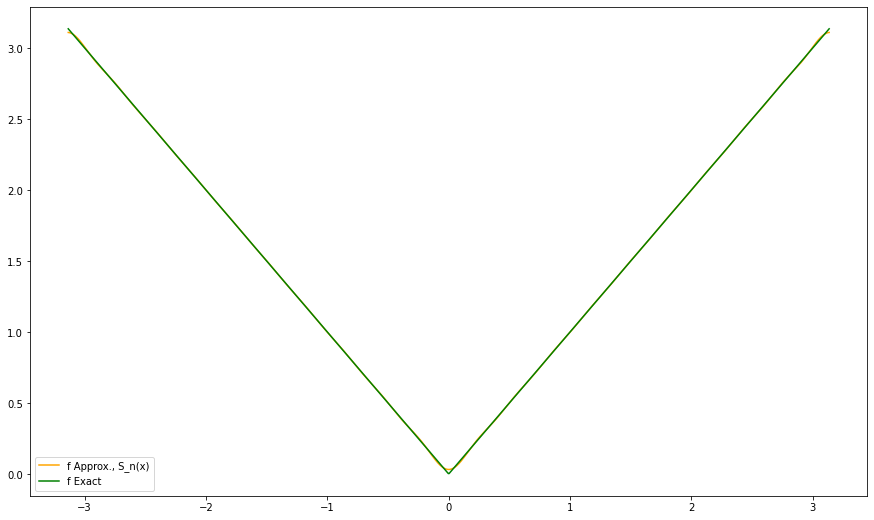

--- end ---


 
------------------------------
Results computed (m = 40)
------------------------------
The error in approximation is :  0.012908114243509333


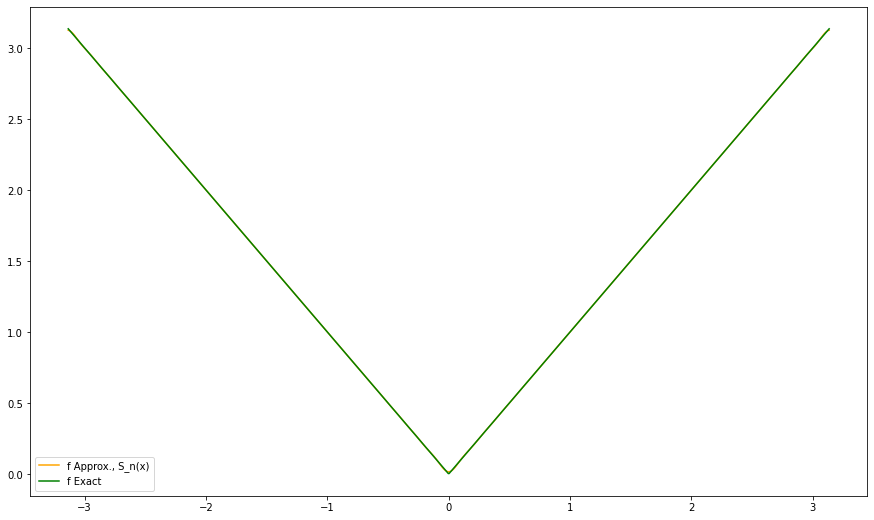

--- end ---


 
------------------------------
Results computed (m = 80)
------------------------------
The error in approximation is :  0.005087090711097772


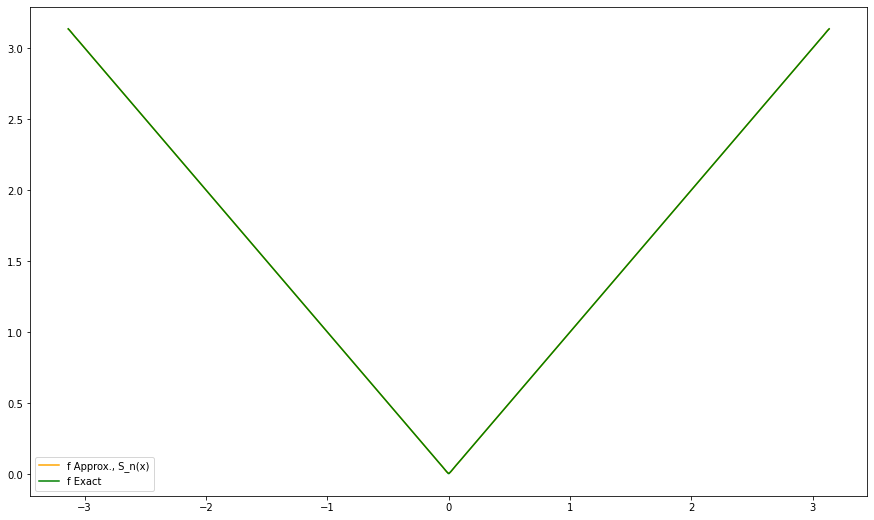

--- end ---


 
------------------------------
Results computed (m = 160)
------------------------------
The error in approximation is :  0.0013790484157767402


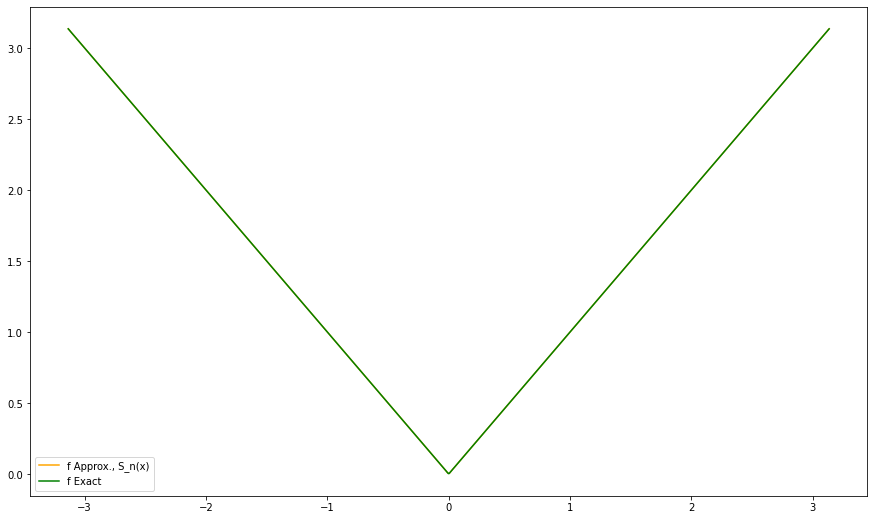

--- end ---


 
------------------------------
Results computed (m = 320)
------------------------------
The error in approximation is :  0.0006894877316354631


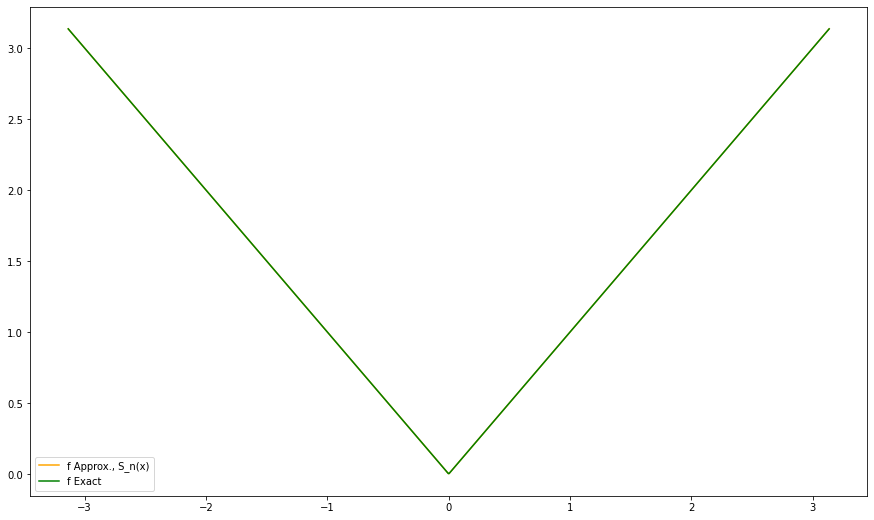

--- end ---


 
------------------------------
Results computed (m = 640)
------------------------------
The error in approximation is :  0.0002797658726023228


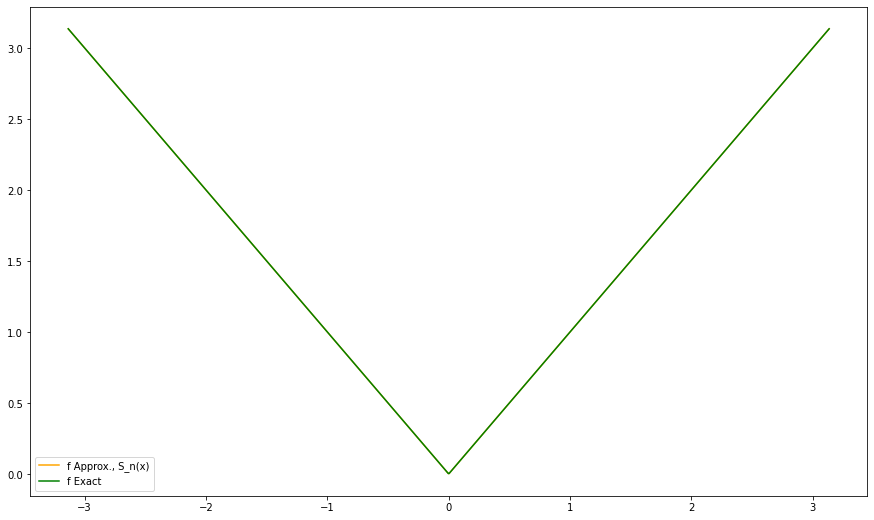

--- end ---


 
------------------------------
Results computed (m = 1280)
------------------------------
The error in approximation is :  0.00014471004199456206


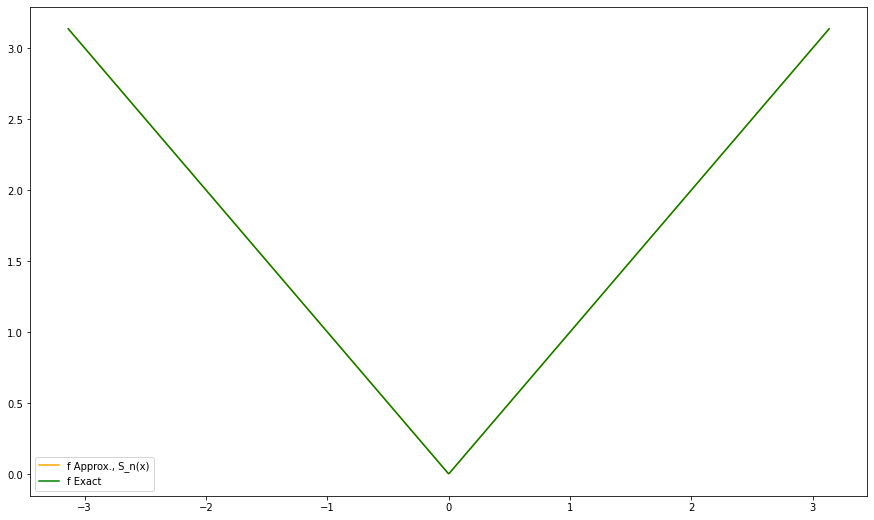

--- end ---


 


In [29]:
# Endpoints not considered...

numb = 1000
fxn = lambda x: abs(x)
apxx = []

# Computation module...
for m in iter:
    apxx.append(result(m, numb, fxn))


The Ratio values E-2N/E-N are:
[0.4761289118680959, 0.44923761155009906, 0.3941002237143776, 0.2710878366623715, 0.4999735496937673, 0.4057590291544694, 0.5172540905311285]

 Graph:


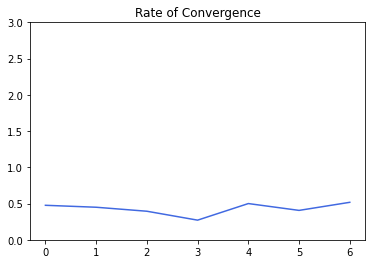

In [30]:
# Plot for convergence...

r_conv(apxx)

### 5.6. Function with Jump-Discontinuities | $f(x) = signum(x)$

------------------------------
Results computed (m = 10)
------------------------------
The error in approximation is :  0.9999999999999992


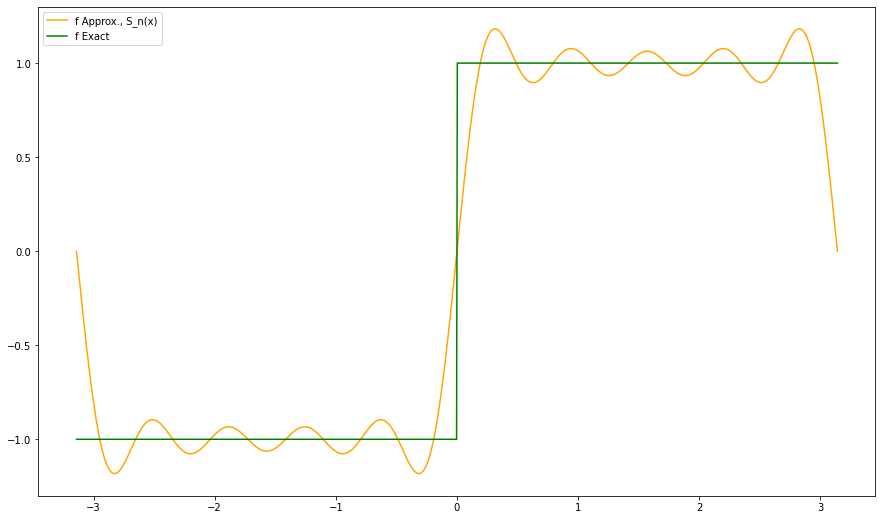

--- end ---


 
------------------------------
Results computed (m = 20)
------------------------------
The error in approximation is :  0.9999999999999988


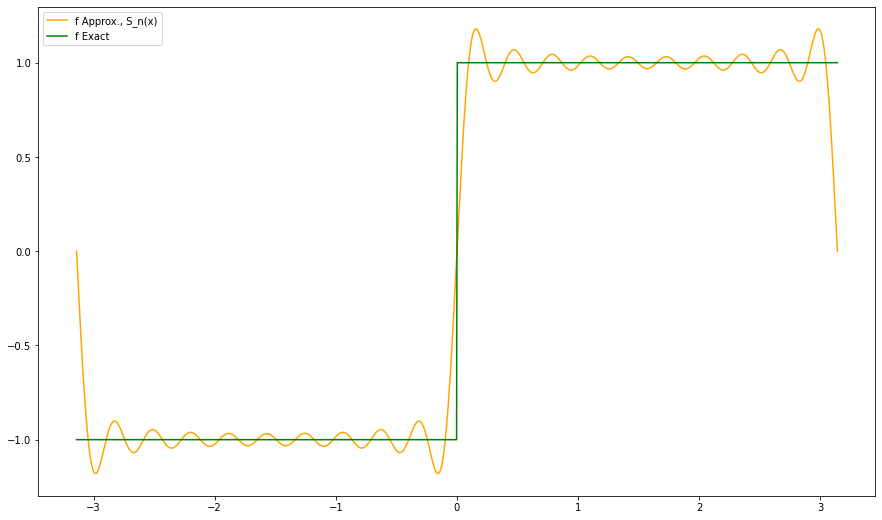

--- end ---


 
------------------------------
Results computed (m = 40)
------------------------------
The error in approximation is :  0.9999999999999983


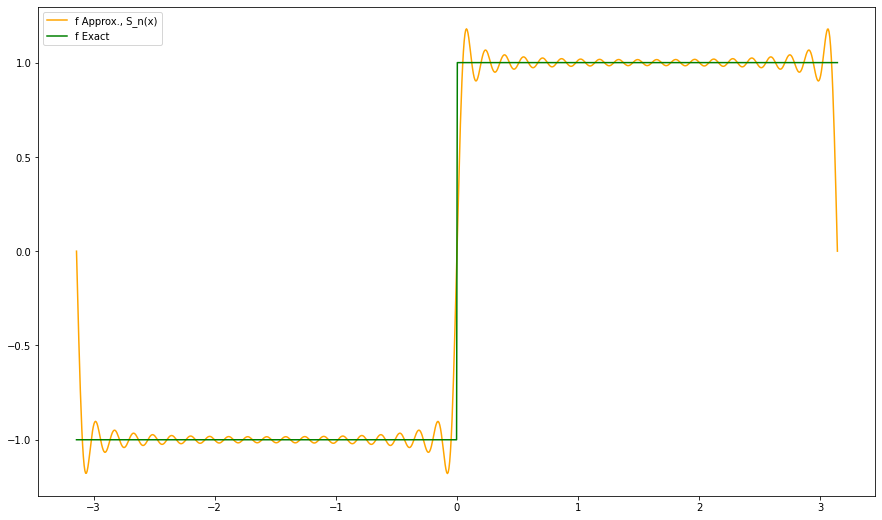

--- end ---


 
------------------------------
Results computed (m = 80)
------------------------------
The error in approximation is :  0.9999999999999948


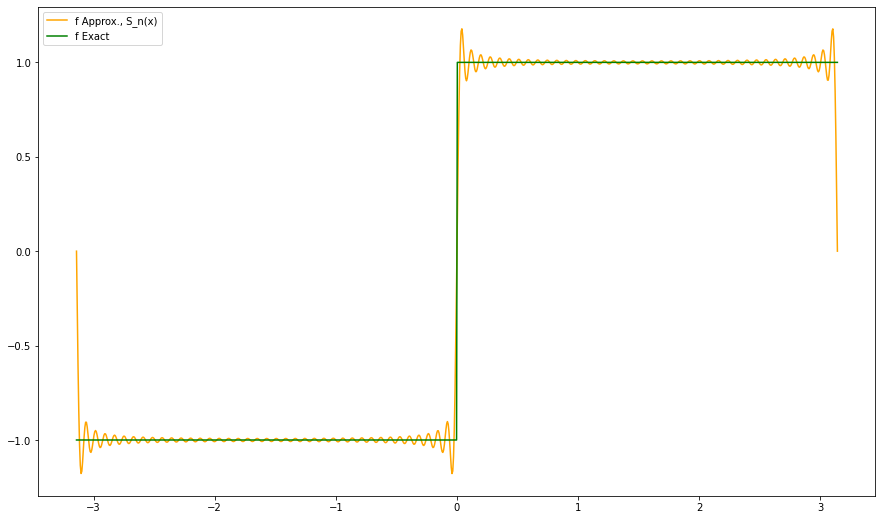

--- end ---


 
------------------------------
Results computed (m = 160)
------------------------------
The error in approximation is :  0.9999999999999891


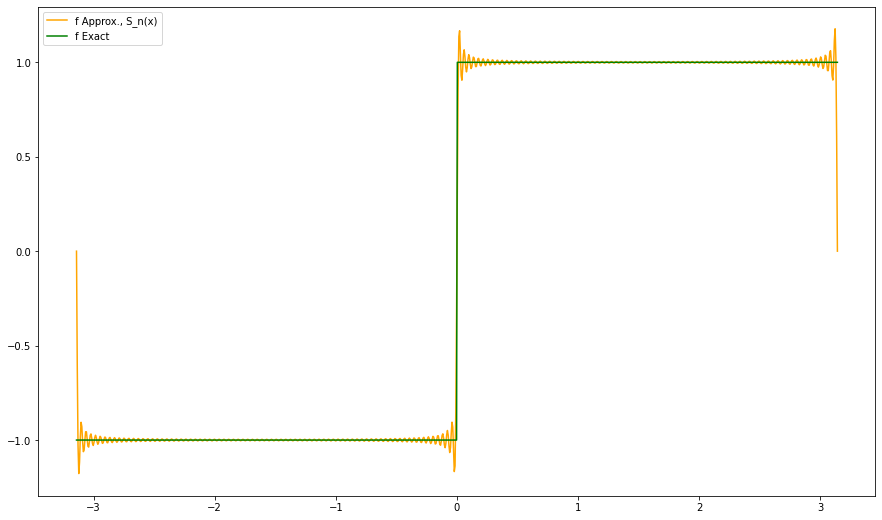

--- end ---


 
------------------------------
Results computed (m = 320)
------------------------------
The error in approximation is :  0.9999999999999755


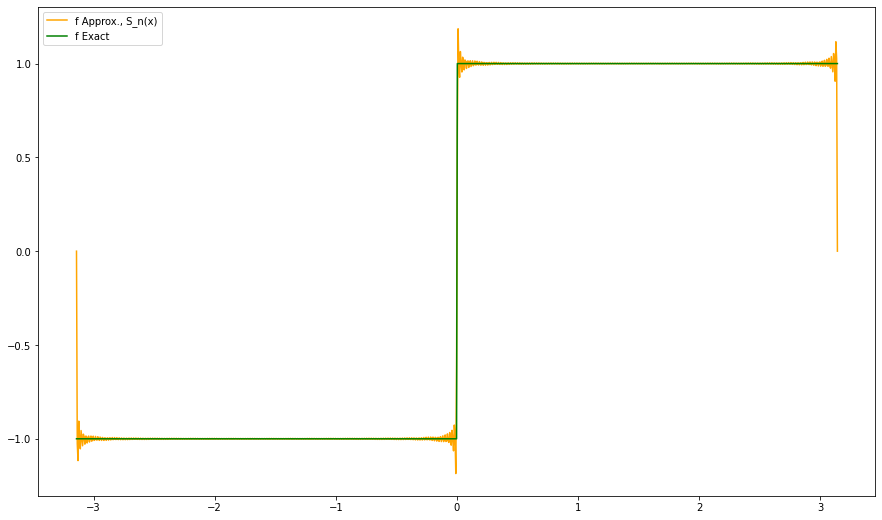

--- end ---


 
------------------------------
Results computed (m = 640)
------------------------------
The error in approximation is :  0.9999999999999938


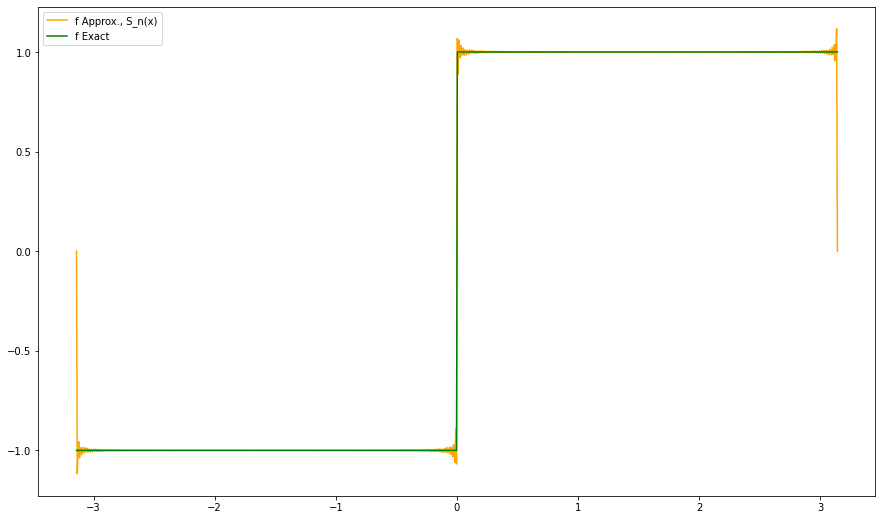

--- end ---


 
------------------------------
Results computed (m = 1280)
------------------------------
The error in approximation is :  0.9999999999999653


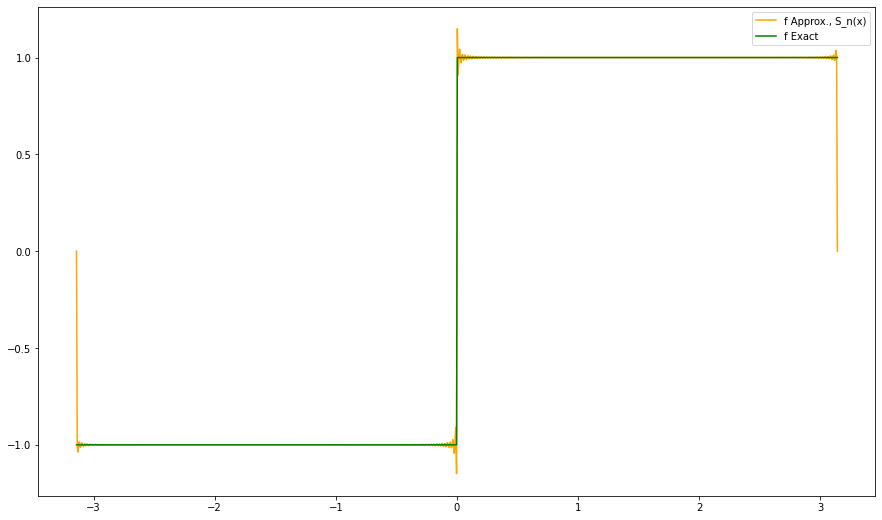

--- end ---


 


In [31]:
# Endpoints considered...

numb = 1000
fxn = lambda x: np.sign(x)
apxx = []

# Computation module...
for m in iter:
    apxx.append(results(m, numb, fxn))


The Ratio values E-2N/E-N are:
[0.9999999999999996, 0.9999999999999996, 0.9999999999999964, 0.9999999999999943, 0.9999999999999863, 1.0000000000000184, 0.9999999999999715]

 Graph:


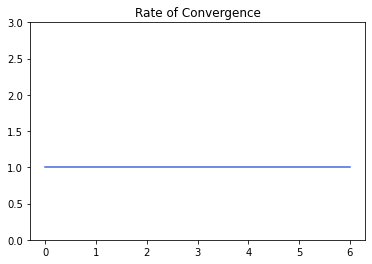

In [32]:
# Plot for convergence...

r_conv(apxx)

------------------------------
Results computed (m = 10)
------------------------------
The error in approximation is :  0.9800207924222888


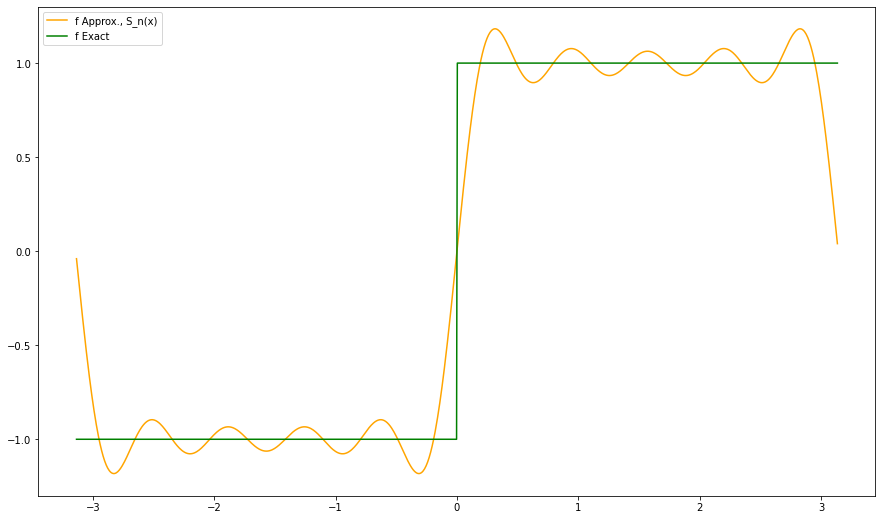

--- end ---


 
------------------------------
Results computed (m = 20)
------------------------------
The error in approximation is :  0.9600466718637615


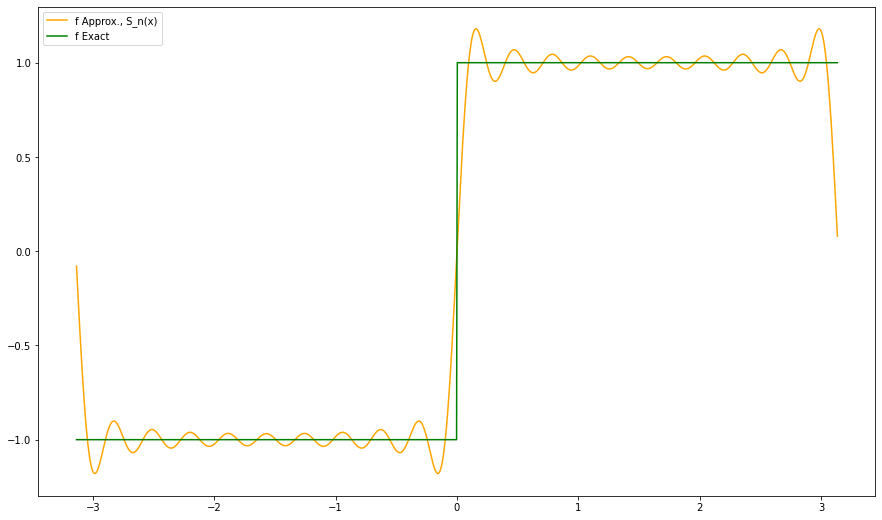

--- end ---


 
------------------------------
Results computed (m = 40)
------------------------------
The error in approximation is :  0.9201343117819978


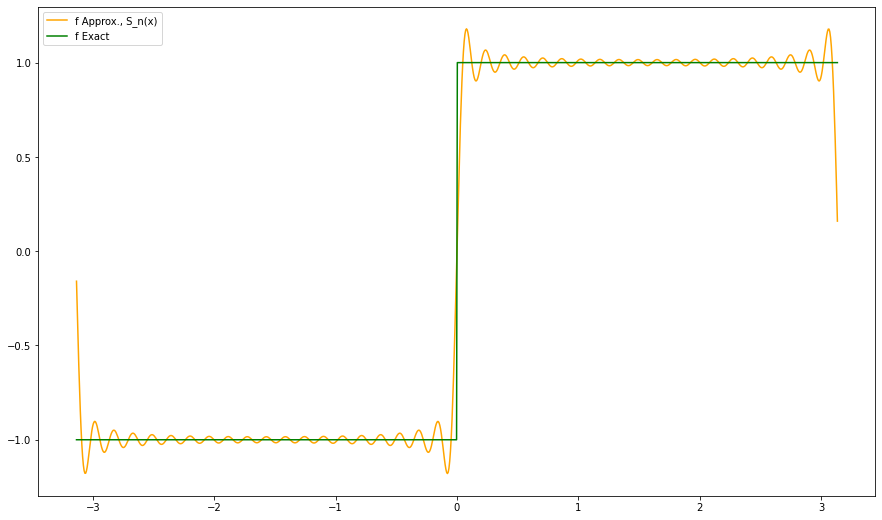

--- end ---


 
------------------------------
Results computed (m = 80)
------------------------------
The error in approximation is :  0.8405972056933873


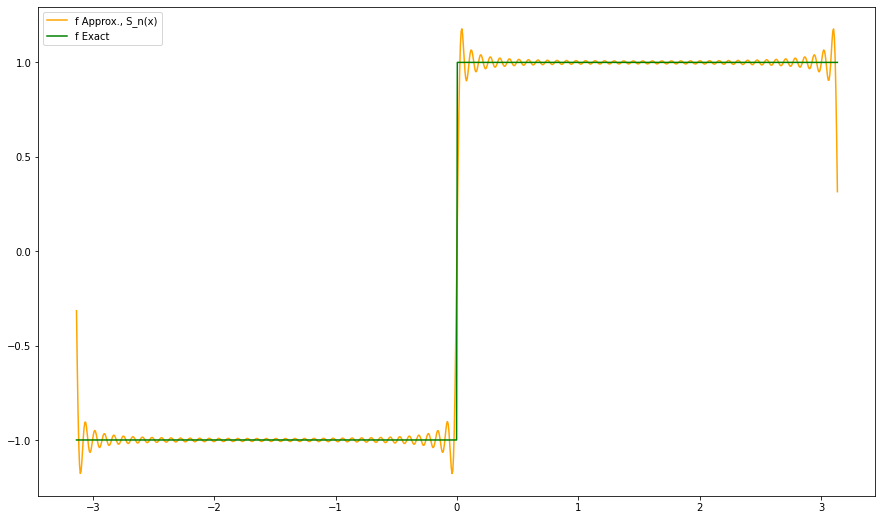

--- end ---


 
------------------------------
Results computed (m = 160)
------------------------------
The error in approximation is :  0.6838183302283851


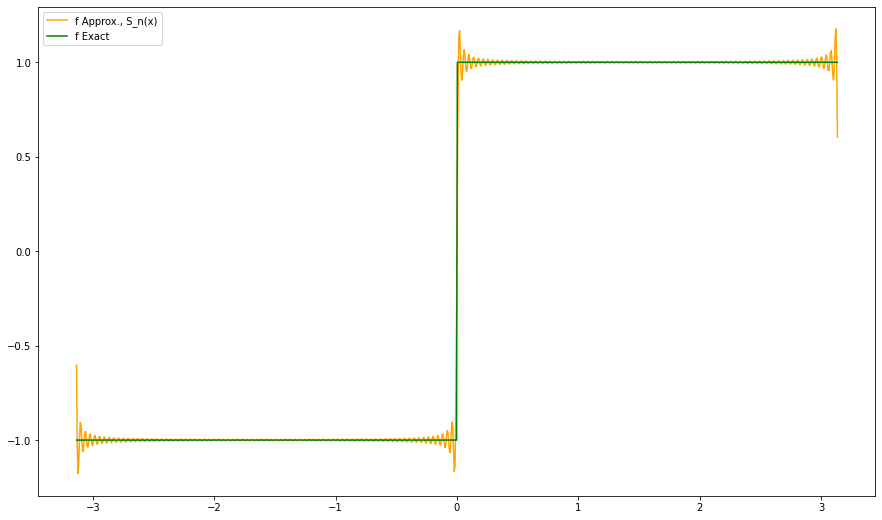

--- end ---


 
------------------------------
Results computed (m = 320)
------------------------------
The error in approximation is :  0.38835030576400953


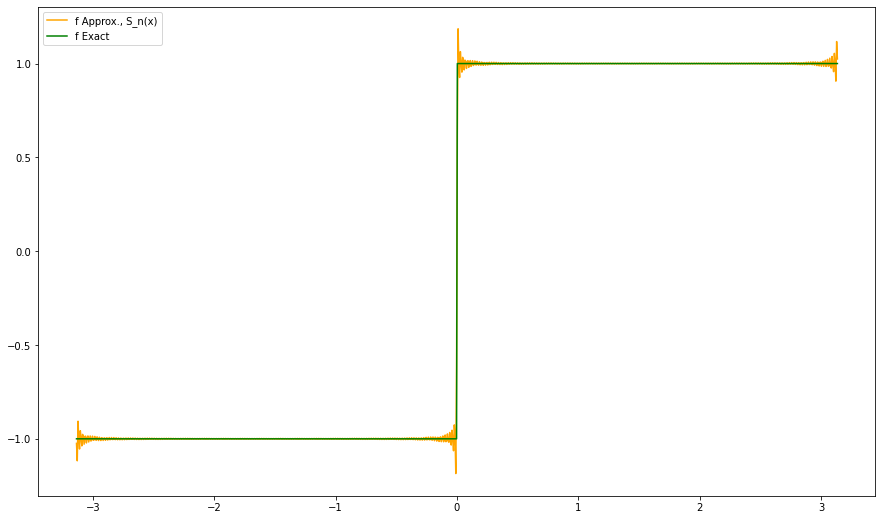

--- end ---


 
------------------------------
Results computed (m = 640)
------------------------------
The error in approximation is :  0.11728343421820142


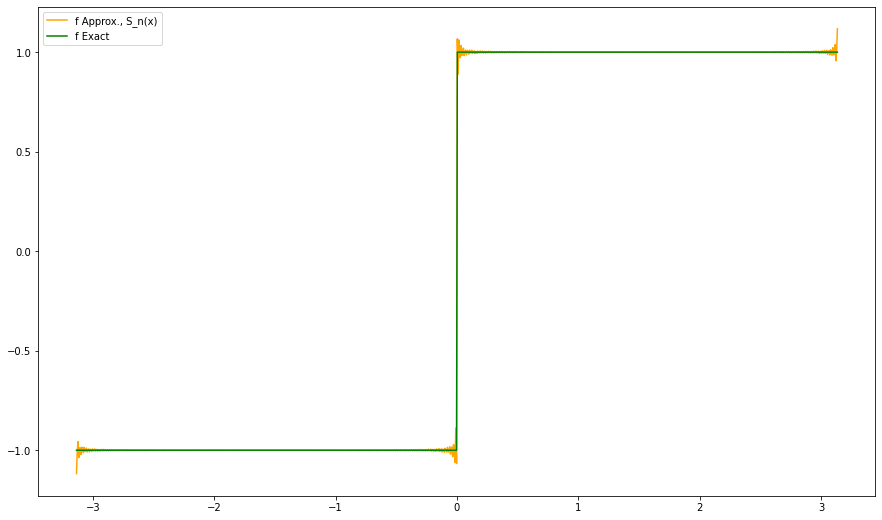

--- end ---


 
------------------------------
Results computed (m = 1280)
------------------------------
The error in approximation is :  0.1503670487173583


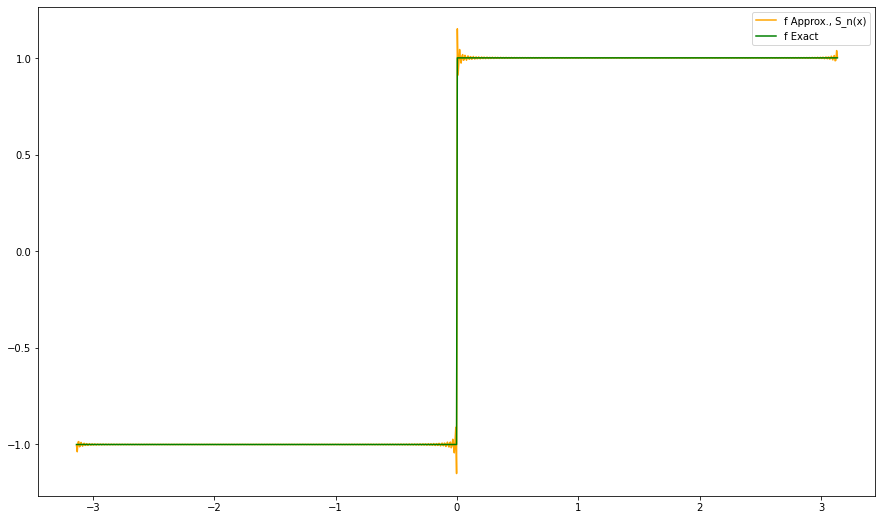

--- end ---


 


In [33]:
# Endpoints not considered...

numb = 1000
fxn = lambda x: np.sign(x)
apxx = []

# Computation module...
for m in iter:
    apxx.append(result(m, numb, fxn))


The Ratio values E-2N/E-N are:
[0.9796186767536249, 0.95842664606682, 0.9135592433950503, 0.8134910818128651, 0.5679144424723249, 0.3020042278258731, 1.282082586681475]

 Graph:


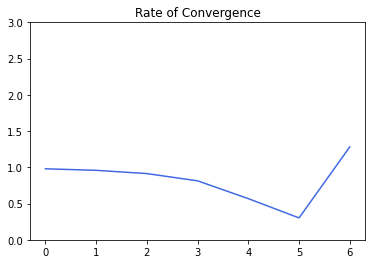

In [34]:
# Plot for convergence...

r_conv(apxx)

### 5.7. Function with Discontinuity of the second type | $f(x) = \frac{1}{x}$

------------------------------
Results computed (m = 10)
------------------------------
The error in approximation is :  317.81868735366237


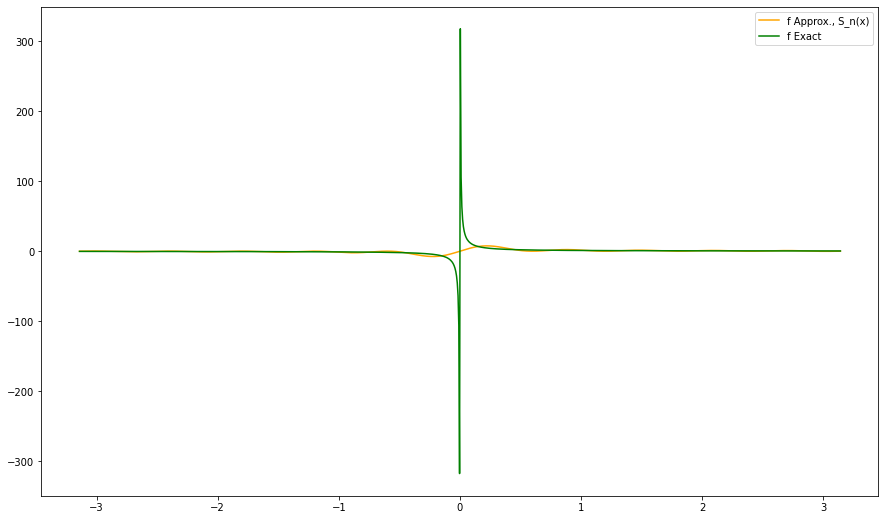

--- end ---


 
------------------------------
Results computed (m = 20)
------------------------------
The error in approximation is :  317.3314661887778


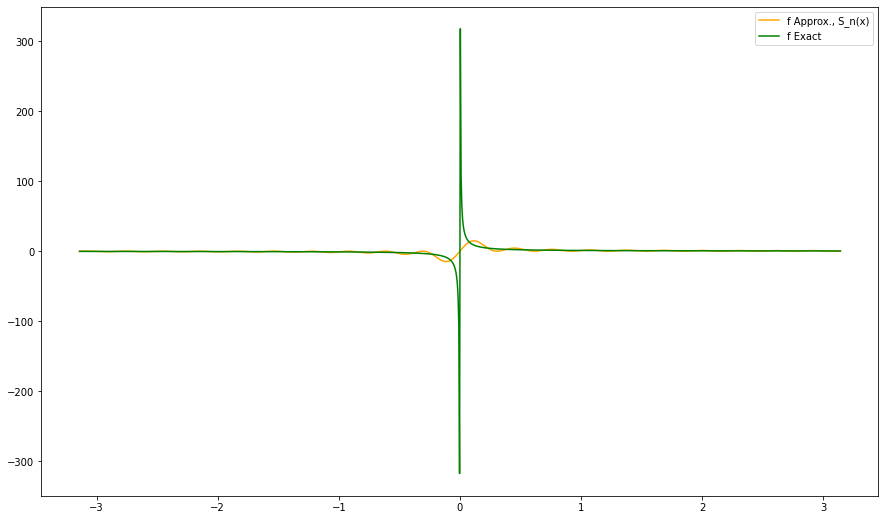

--- end ---


 
------------------------------
Results computed (m = 40)
------------------------------
The error in approximation is :  315.4164306364576


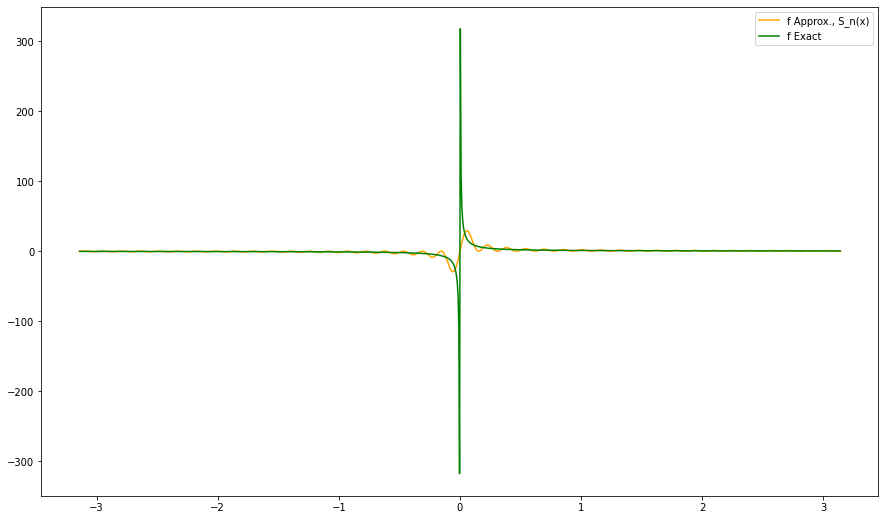

--- end ---


 
------------------------------
Results computed (m = 80)
------------------------------
The error in approximation is :  307.85697588209985


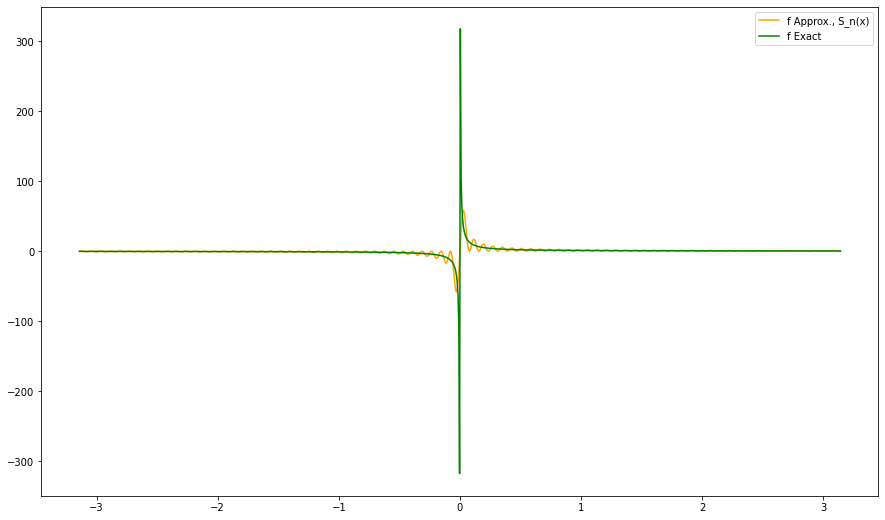

--- end ---


 
------------------------------
Results computed (m = 160)
------------------------------
The error in approximation is :  278.3400050683633


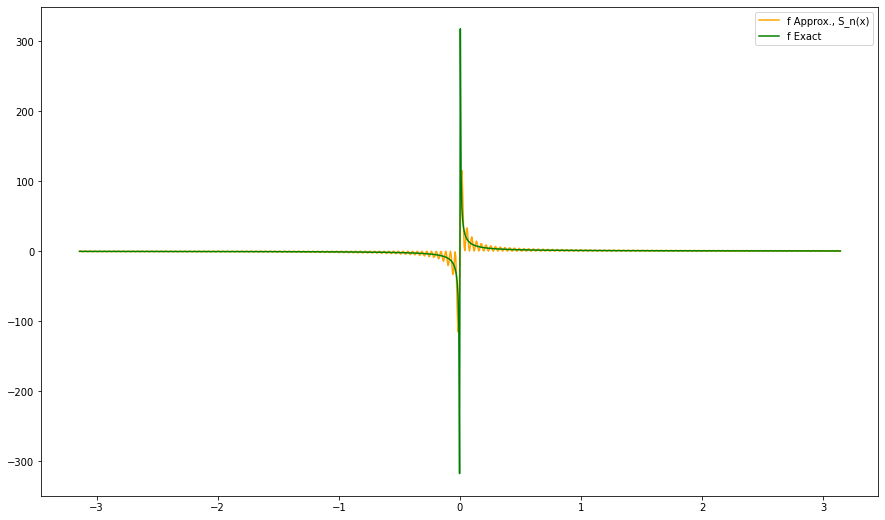

--- end ---


 
------------------------------
Results computed (m = 320)
------------------------------
The error in approximation is :  169.69582979911817


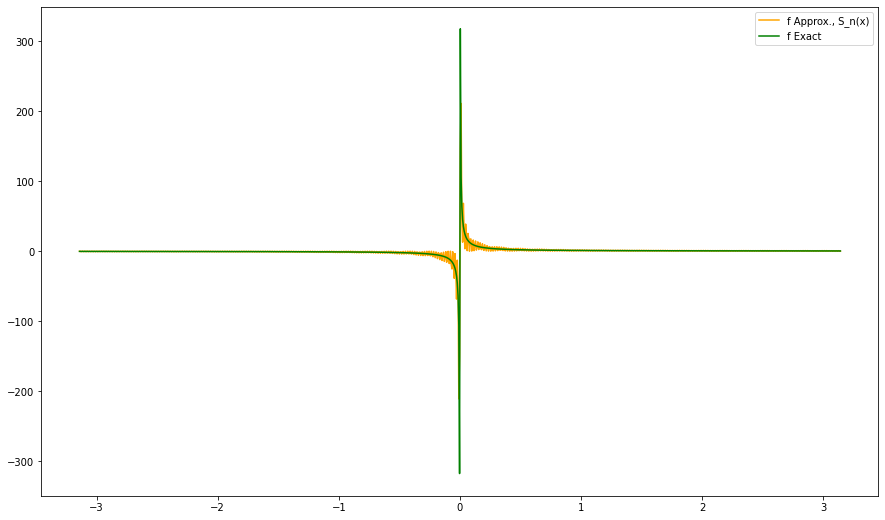

--- end ---


 
------------------------------
Results computed (m = 640)
------------------------------
The error in approximation is :  136.4247719741321


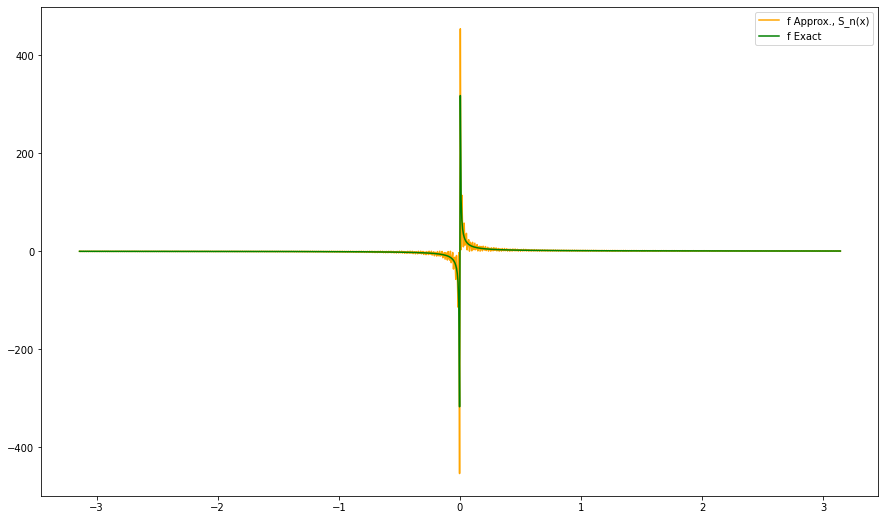

--- end ---


 
------------------------------
Results computed (m = 1280)
------------------------------
The error in approximation is :  201.32092149564141


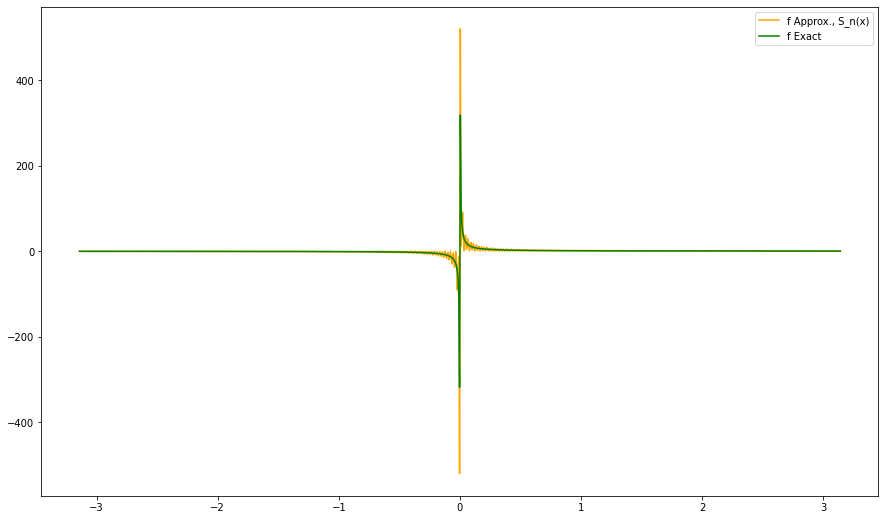

--- end ---


 


In [35]:
# Endpoints considered...

numb = 1000
fxn = lambda x: np.reciprocal(x)
apxx = []

# Computation module...
for m in iter:
    apxx.append(results(m, numb, fxn))


The Ratio values E-2N/E-N are:
[0.998466983899086, 0.9939651885918526, 0.976033414812589, 0.9041211564910563, 0.6096710020445643, 0.8039370922410319, 1.4756918306142703]

 Graph:


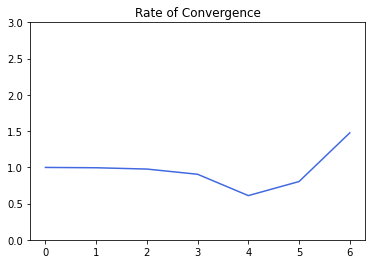

In [36]:
# Plot for convergence...

r_conv(apxx)

------------------------------
Results computed (m = 10)
------------------------------
The error in approximation is :  318.4556524962321


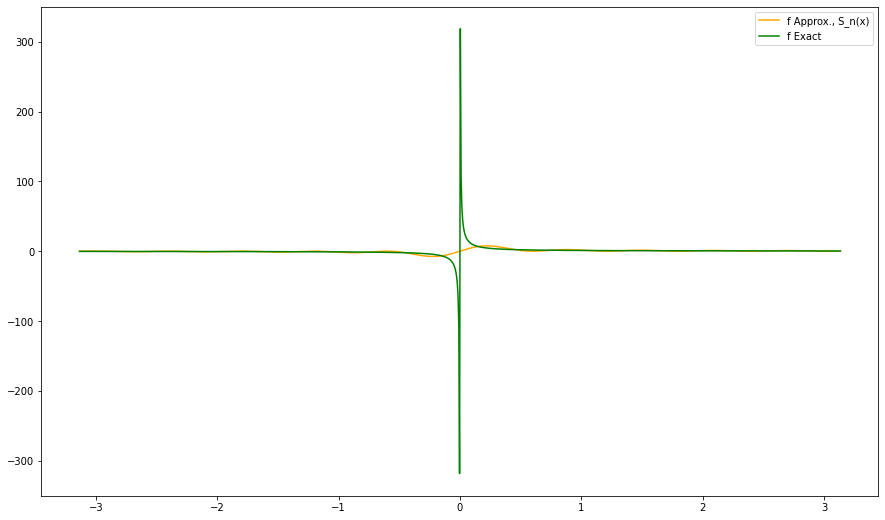

--- end ---


 
------------------------------
Results computed (m = 20)
------------------------------
The error in approximation is :  317.9694039528985


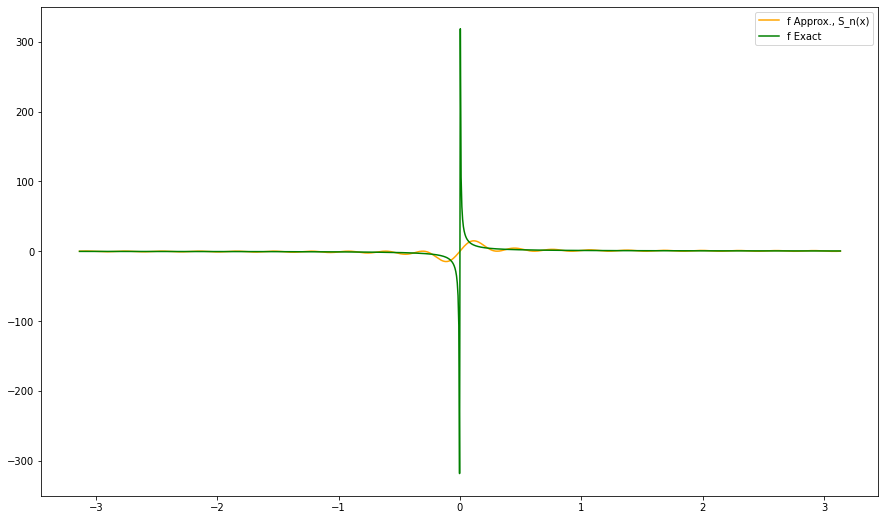

--- end ---


 
------------------------------
Results computed (m = 40)
------------------------------
The error in approximation is :  316.0581816881665


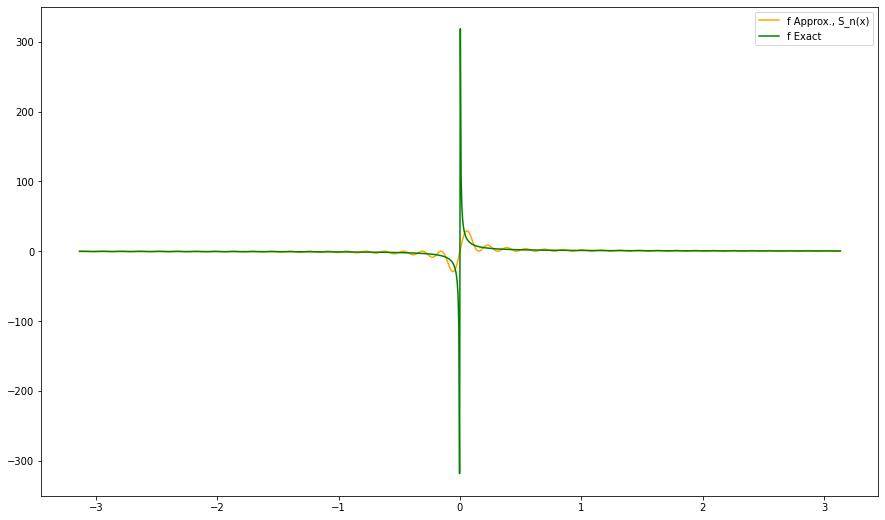

--- end ---


 
------------------------------
Results computed (m = 80)
------------------------------
The error in approximation is :  308.51362876445904


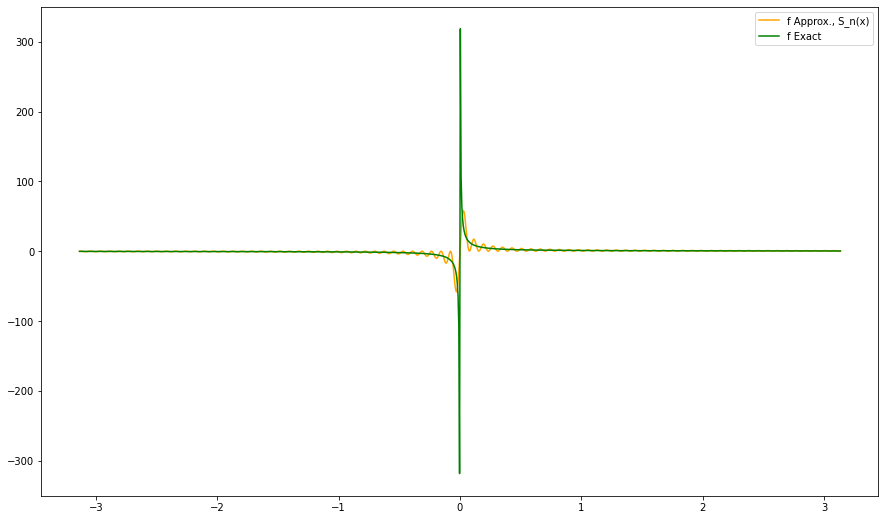

--- end ---


 
------------------------------
Results computed (m = 160)
------------------------------
The error in approximation is :  279.05248072199043


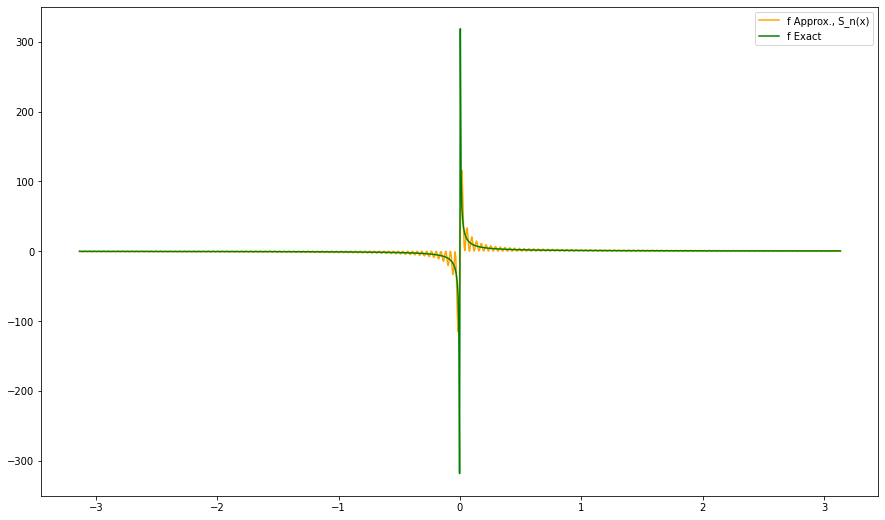

--- end ---


 
------------------------------
Results computed (m = 320)
------------------------------
The error in approximation is :  170.5778558523597


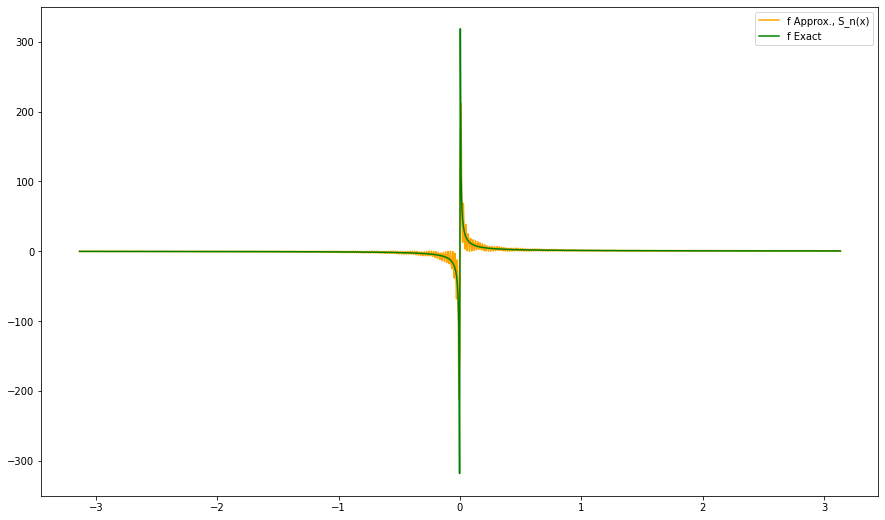

--- end ---


 
------------------------------
Results computed (m = 640)
------------------------------
The error in approximation is :  135.53851117845386


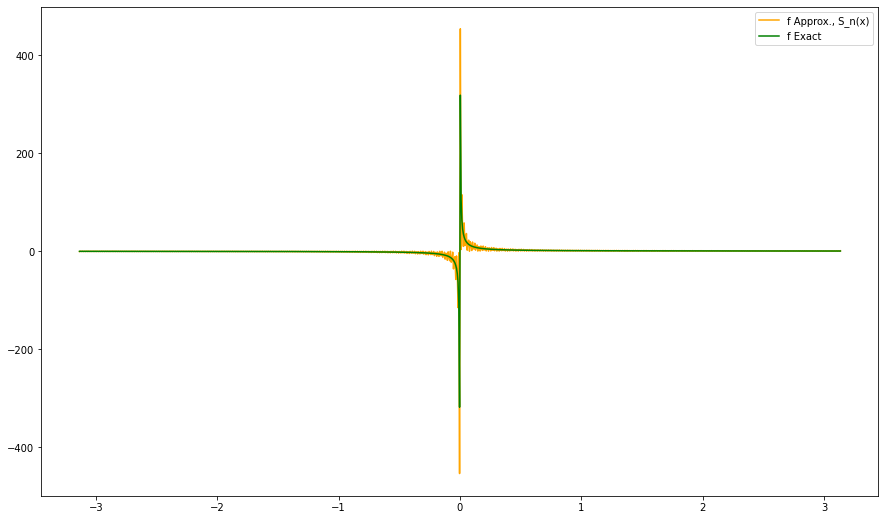

--- end ---


 
------------------------------
Results computed (m = 1280)
------------------------------
The error in approximation is :  203.70179160089515


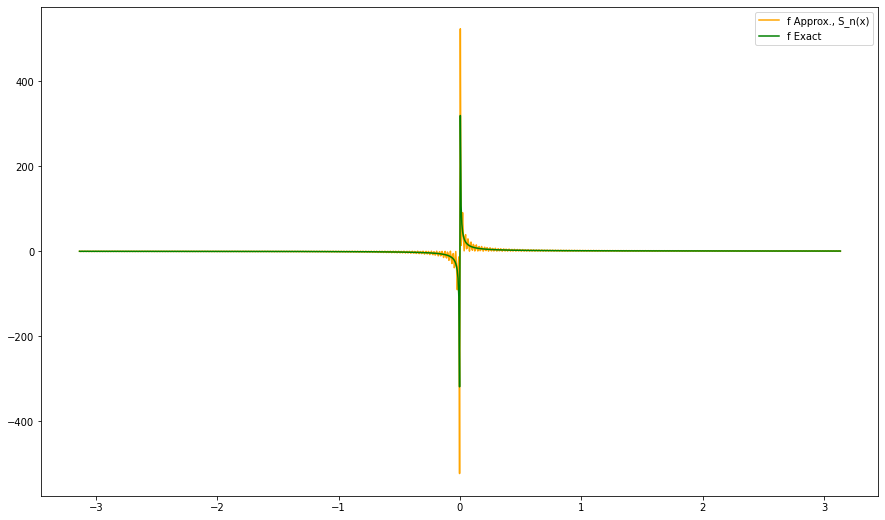

--- end ---


 


In [37]:
# Endpoints not considered...

numb = 1000
fxn = lambda x: np.reciprocal(x)
apxx = []

# Computation module...
for m in iter:
    apxx.append(result(m, numb, fxn))


The Ratio values E-2N/E-N are:
[0.9984731043725489, 0.9939892887775607, 0.9761292275890167, 0.9045061699204177, 0.6112751816827604, 0.7945844465049822, 1.502907106104298]

 Graph:


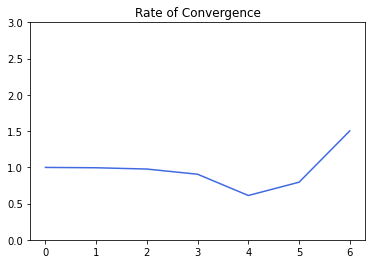

In [38]:
# Plot for convergence...

r_conv(apxx)

## 6. Checking for Gibb's Phenomena in the case of $f(x) = x$ when $x \in [-\pi,\pi]$

------------------------------
Results computed (m = 10)
------------------------------
The error in approximation is :  3.141592653589791


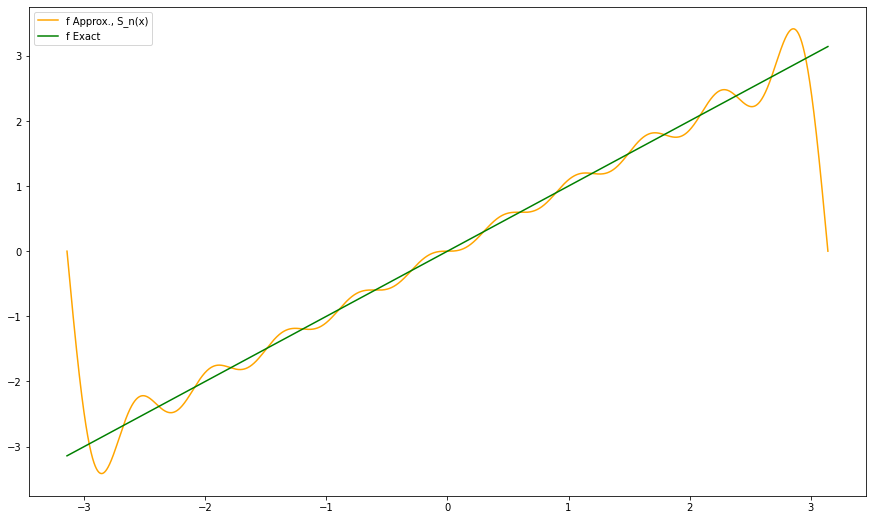

--- end ---


 
------------------------------
Results computed (m = 20)
------------------------------
The error in approximation is :  3.141592653589789


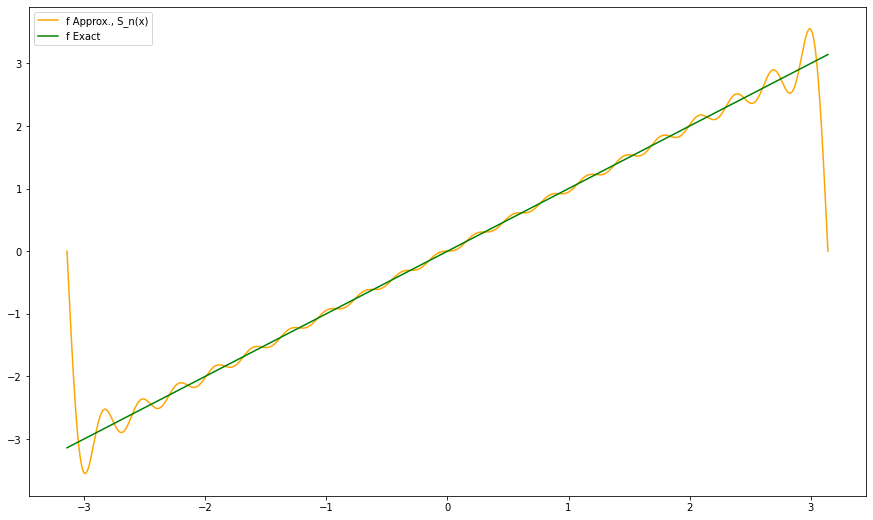

--- end ---


 
------------------------------
Results computed (m = 40)
------------------------------
The error in approximation is :  3.1415926535897856


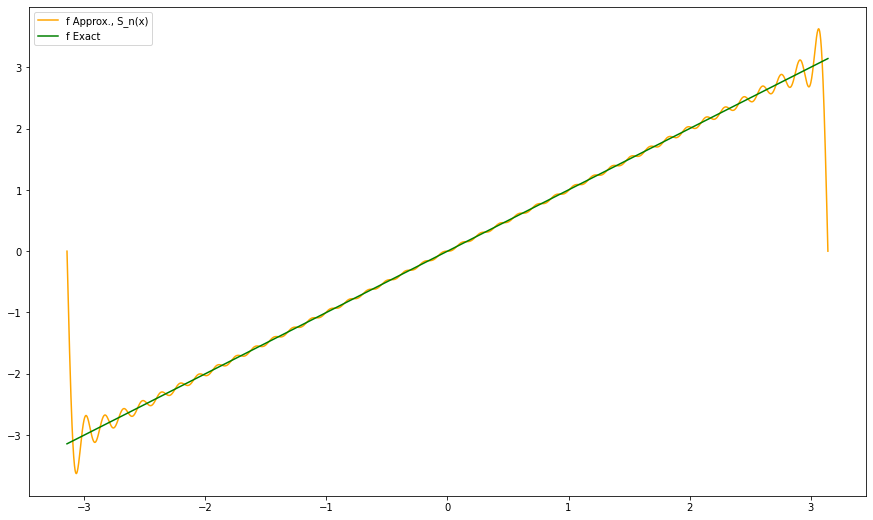

--- end ---


 
------------------------------
Results computed (m = 80)
------------------------------
The error in approximation is :  3.141592653589775


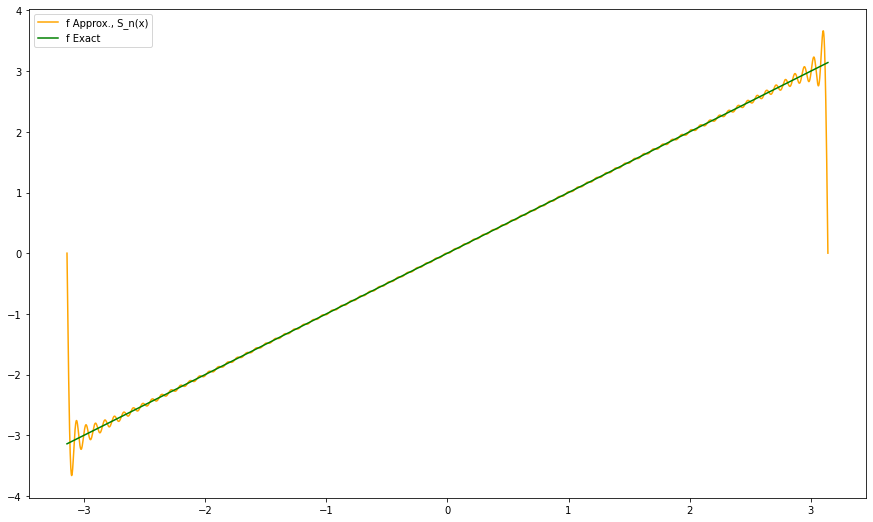

--- end ---


 
------------------------------
Results computed (m = 160)
------------------------------
The error in approximation is :  3.141592653589755


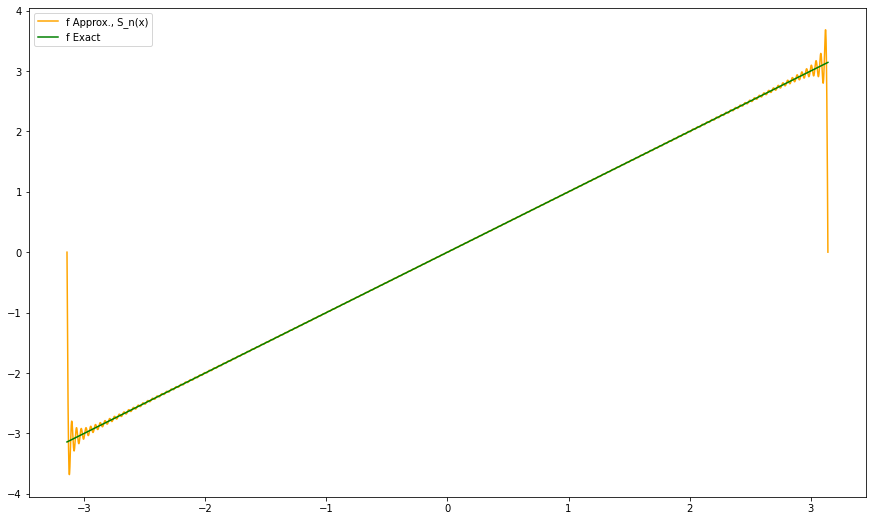

--- end ---


 
------------------------------
Results computed (m = 320)
------------------------------
The error in approximation is :  3.1415926535897256


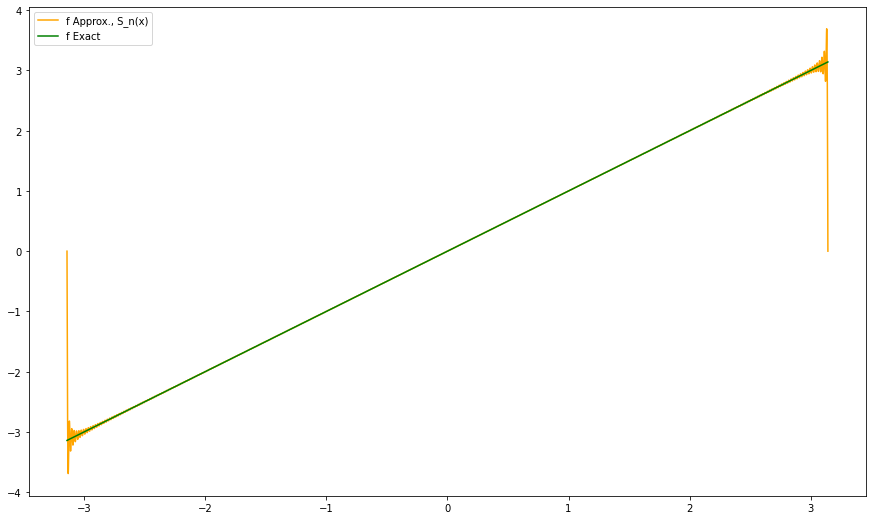

--- end ---


 
------------------------------
Results computed (m = 640)
------------------------------
The error in approximation is :  3.141592653589748


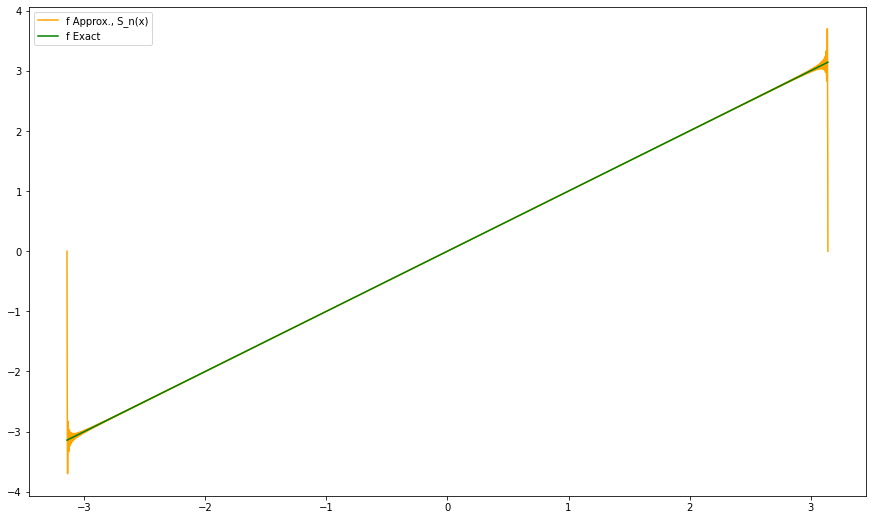

--- end ---


 
------------------------------
Results computed (m = 1280)
------------------------------
The error in approximation is :  3.1415926535897096


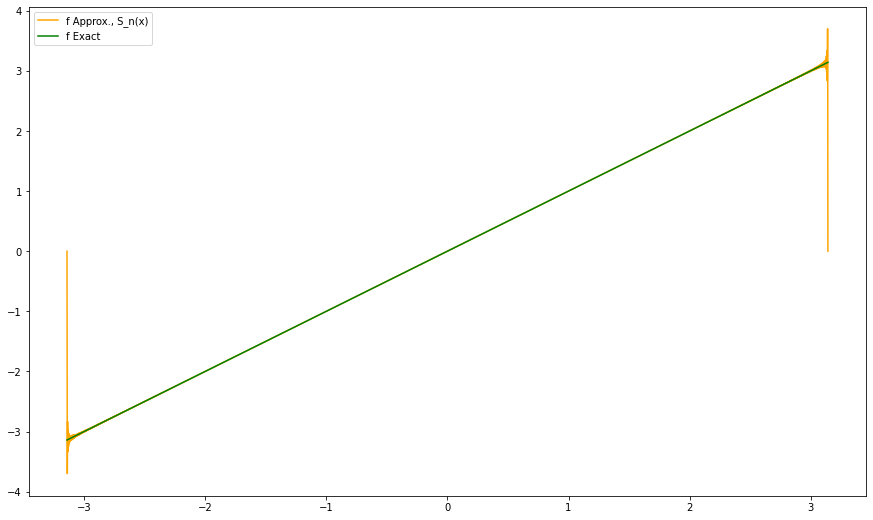

--- end ---


 


In [39]:
# Endpoints considered...

numb = 5000
fxn = lambda x: x
apxx = []

# Computation module...
for m in iter:
    apxx.append(results(m, numb, fxn))


The Ratio values E-2N/E-N are:
[0.9999999999999994, 0.9999999999999989, 0.9999999999999966, 0.9999999999999937, 0.9999999999999907, 1.000000000000007, 0.9999999999999879]

 Graph:


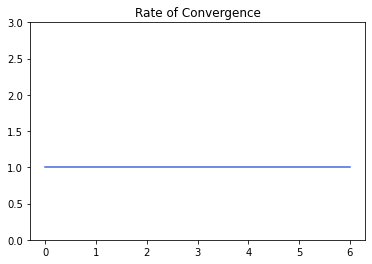

In [40]:
# Plot for convergence...

r_conv(apxx)

### 6.1 Gibb's Phenomena :

$$The\ theory\ for\ Gibb's\ Phenomena\ says:$$

**Theorem :** Let $f$ be a piece-wise continuously differentiable function except at $x_0 \in \mathbb{R}$, where $f$ has a jump discontinuity of finite jump.
$$\mathop{lim}_{n\to \infty}[S_n(x_0 + \frac{2\pi}{2n}) - f(x_0^+)] = (\frac{1}{\pi}Si(\pi) - \frac{1}{2})(f(x_0^+) - f(x_0^-))$$
$$\mathop{lim}_{n\to \infty}[S_n(x_0 - \frac{2\pi}{2n}) - f(x_0^-)] = (\frac{1}{\pi}Si(\pi) - \frac{1}{2})(f(x_0^-) - f(x_0^+)),$$ where $Si(\pi) = \int_0^\pi \frac{sin(t)}{t}dt$.


1. Basically, the error of Fourier Approximation near the point of Jump Discontinuity almost equals 9% of the jump present there, since $(\frac{1}{\pi}Si(\pi) - \frac{1}{2}) \approx 0.089489872236083635116$ [obtained numerically].

|S_n(x)-f(x)| values near the left endpoint are:
[0.26551890718310345, 0.40956305714572494, 0.48444767258540233, 0.5233502542661612, 0.5398655023118444, 0.5501733061538725, 0.5553233843405652, 0.5578974674516308]
-----------------
|S_n(x)-f(x)| values near the right endpoint are:
[0.26551890718310434, 0.40956305714572316, 0.4844476725853979, 0.5233502542661639, 0.5398655023118542, 0.5501733061538752, 0.5553233843408227, 0.5578974674510011]


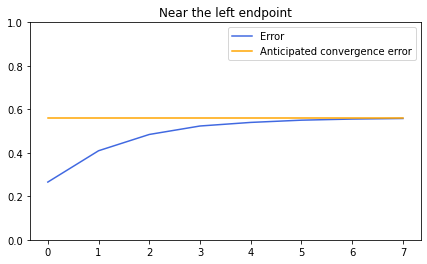

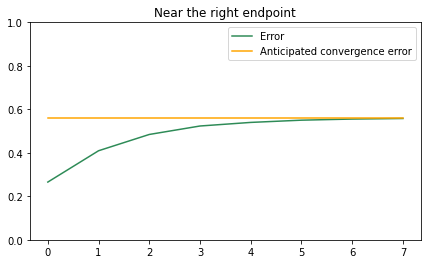

In [41]:
# Plots for observing the Gibb's Phenomena...

gibbs(gibbl, gibbr)

- Total Runtime : 01 hour 52 minutes.